In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
mpl.rcParams["text.usetex"] = False
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


In [68]:
results = pd.read_csv("aggregate/aggregate_results.csv")
print(len(results))

504


In [69]:
onemedia = results.loc[results['media_op']=="0.0"]
threemedia = results.loc[results['media_op']=='0.05;0.5;0.95']

In [70]:
print(len(results))
print(len(onemedia))
print(len(threemedia))
print(len(metrics))
print(len(entropy)) #c'è qualcosa di sbagliato

504
252
252
252
216


In [73]:
#rifare i plot dal fisso e mettere le label in latex per paper
def heatmapsplot(results, measure, x, y, grouping):

    params = ['p_media', 'gam', 'gam_media', 'eps']
    paramsnames = ['p', '$\gamma$', '$\gamma_{media}$', '$\epsilon$']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
    # sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    sns.set(font_scale=0.4)

    # mpl.rcParams["text.usetex"] = True
    # plt.rc('font',weight='bold',**{'family':'serif', 'size':6, 'serif':['Computer Modern Roman']})
    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 3.6), dpi=600)
        fmt = ".2f"
        if measure=='avg_niter':
            annot=False
        else:
            annot=True
        i = 0
        j = 0
        for val in results[grouping].unique():
            data = results[results[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, ax= axes[j, i])
            a.set_yticklabels(a.get_yticklabels(), rotation = 0)
            a.set_xticklabels(a.get_xticklabels(), rotation = 0)
            axes[j, i].set_title('{}={}'.format(parmapping[grouping], val), fontsize=5)

            i+=1
            if i % 3 == 0:
                j += 1
                i=0

        for ax in axes.flat:
            ax.set_ylabel('')
            ax.set_xlabel('')
            # ax.set_xlabel(r'{}'.format(parmapping[y]), fontsize=10, labelpad=1)
            ax.tick_params(axis='x', which='major', pad=-2)
            ax.tick_params(axis='y', which='major', pad=-2)

        fig.text(0.00, 0.5, r'{}'.format(parmapping[x]), va='center', rotation='vertical', fontsize=8)
        fig.text(0.5, 0.0, r'{}'.format(parmapping[y]), va='center', rotation='horizontal', fontsize=8)

        # fig.text(0.18, -0.03, r"(a) $p=0.1$", ha='center', fontsize=10)
        # fig.text(0.51, -0.03, r"(b) $p=0.3$", ha='center', fontsize=10)
        # fig.text(0.83, -0.03, r"(c) $p=0.5$", ha='center', fontsize=10)

        cax = fig.add_axes([1.0, 0.3, 0.01, 0.6])
        cbar = fig.colorbar(a.get_children()[0], cax=cax, orientation="vertical")
        cbar.outline.set_visible(False)

        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
        plt.tight_layout()    
        plt.savefig("plots/aggregate/hm media mo{} {} groupedby_{}.png".format(list(results.media_op.unique())[0], measure, grouping))

In [74]:
#va aggiustata la posizione della colorbar
def trisurfplot(data, p):
    params = ['p_media', 'gam', 'gam_media', 'eps']
    paramsnames = ['p', '$\gamma$', '$\gamma_{media}$', '$\epsilon$']
    parmapping = dict(zip(params, paramsnames))
    with sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.1), dpi=600, subplot_kw={'projection': '3d'})
        data = data[data['p_media'] == p]
        i=0
        for measure in ['avg_ncluster', 'avg_pwdist', 'avg_niter']:
            x='eps'
            y='gam'
            ax = axes[i]        
            ax.tick_params(axis='x', which='major', labelsize = 3, pad=-6, labelrotation=45)
            ax.set_xticks(list(data['eps'].unique()))
            ax.tick_params(axis='y', which='major', pad=-3, labelrotation=-35)
            ax.set_yticks(list(data['gam'].unique()))
            ax.tick_params(axis='z', which='major', pad=0) 
            ax.set_title('p={}'.format(p), fontsize=5)
            ax.set_ylabel(r'{}'.format(parmapping[y]), labelpad=-4)
            ax.set_xlabel(r'{}'.format(parmapping[x]), labelpad=-10)
            ax.margins(x=0.1, tight=True)
            surf = ax.plot_trisurf(data[x], data[y], data[measure], cmap=plt.get_cmap('RdBu_r'), linewidth=0.2)
            i += 1
        plt.savefig("plots/aggregate/trisurf media mo{} p{}.png".format(list(results.media_op.unique())[0], p))
        # cax = fig.add_axes([1.0, 0.3, 0.01, 0.6])
        # cb = fig.colorbar(surf, cax=cax, shrink=0.5, aspect=50, orientation = 'vertical', pad=0.05)
        # cb.outline.set_visible(False)
        # cb.ax.tick_params()
        # plt.show()



In [75]:
ps = list(onemedia.p_media.unique())
measures = ['avg_ncluster', 'avg_pwdist', 'avg_niter']
measure_titles = ['Average number of clusters', 'Average pairwise distance', 'Average number of iterations']
titlemapping = dict(zip(measures, measure_titles))

In [76]:
params = ['p', 'gamma', 'gamma_media', 'epsilon']
paramsnames = [r'p', r'$\gamma$', r'$\gamma_{media}$', r'$\epsilon$']
parmapping = dict(zip(params, paramsnames))

C:\Users\valen\AppData\Local\Temp/ipykernel_1600/2034654140.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\valen\AppData\Local\Temp/ipykernel_1600/2034654140.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\valen\AppData\Local\Temp/ipykernel_1600/2034654140.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\valen\AppData\Local\Temp/ipykernel_1600/2034654140.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\valen\AppData\Local\Temp/ipykernel_1600/2034654140.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layo

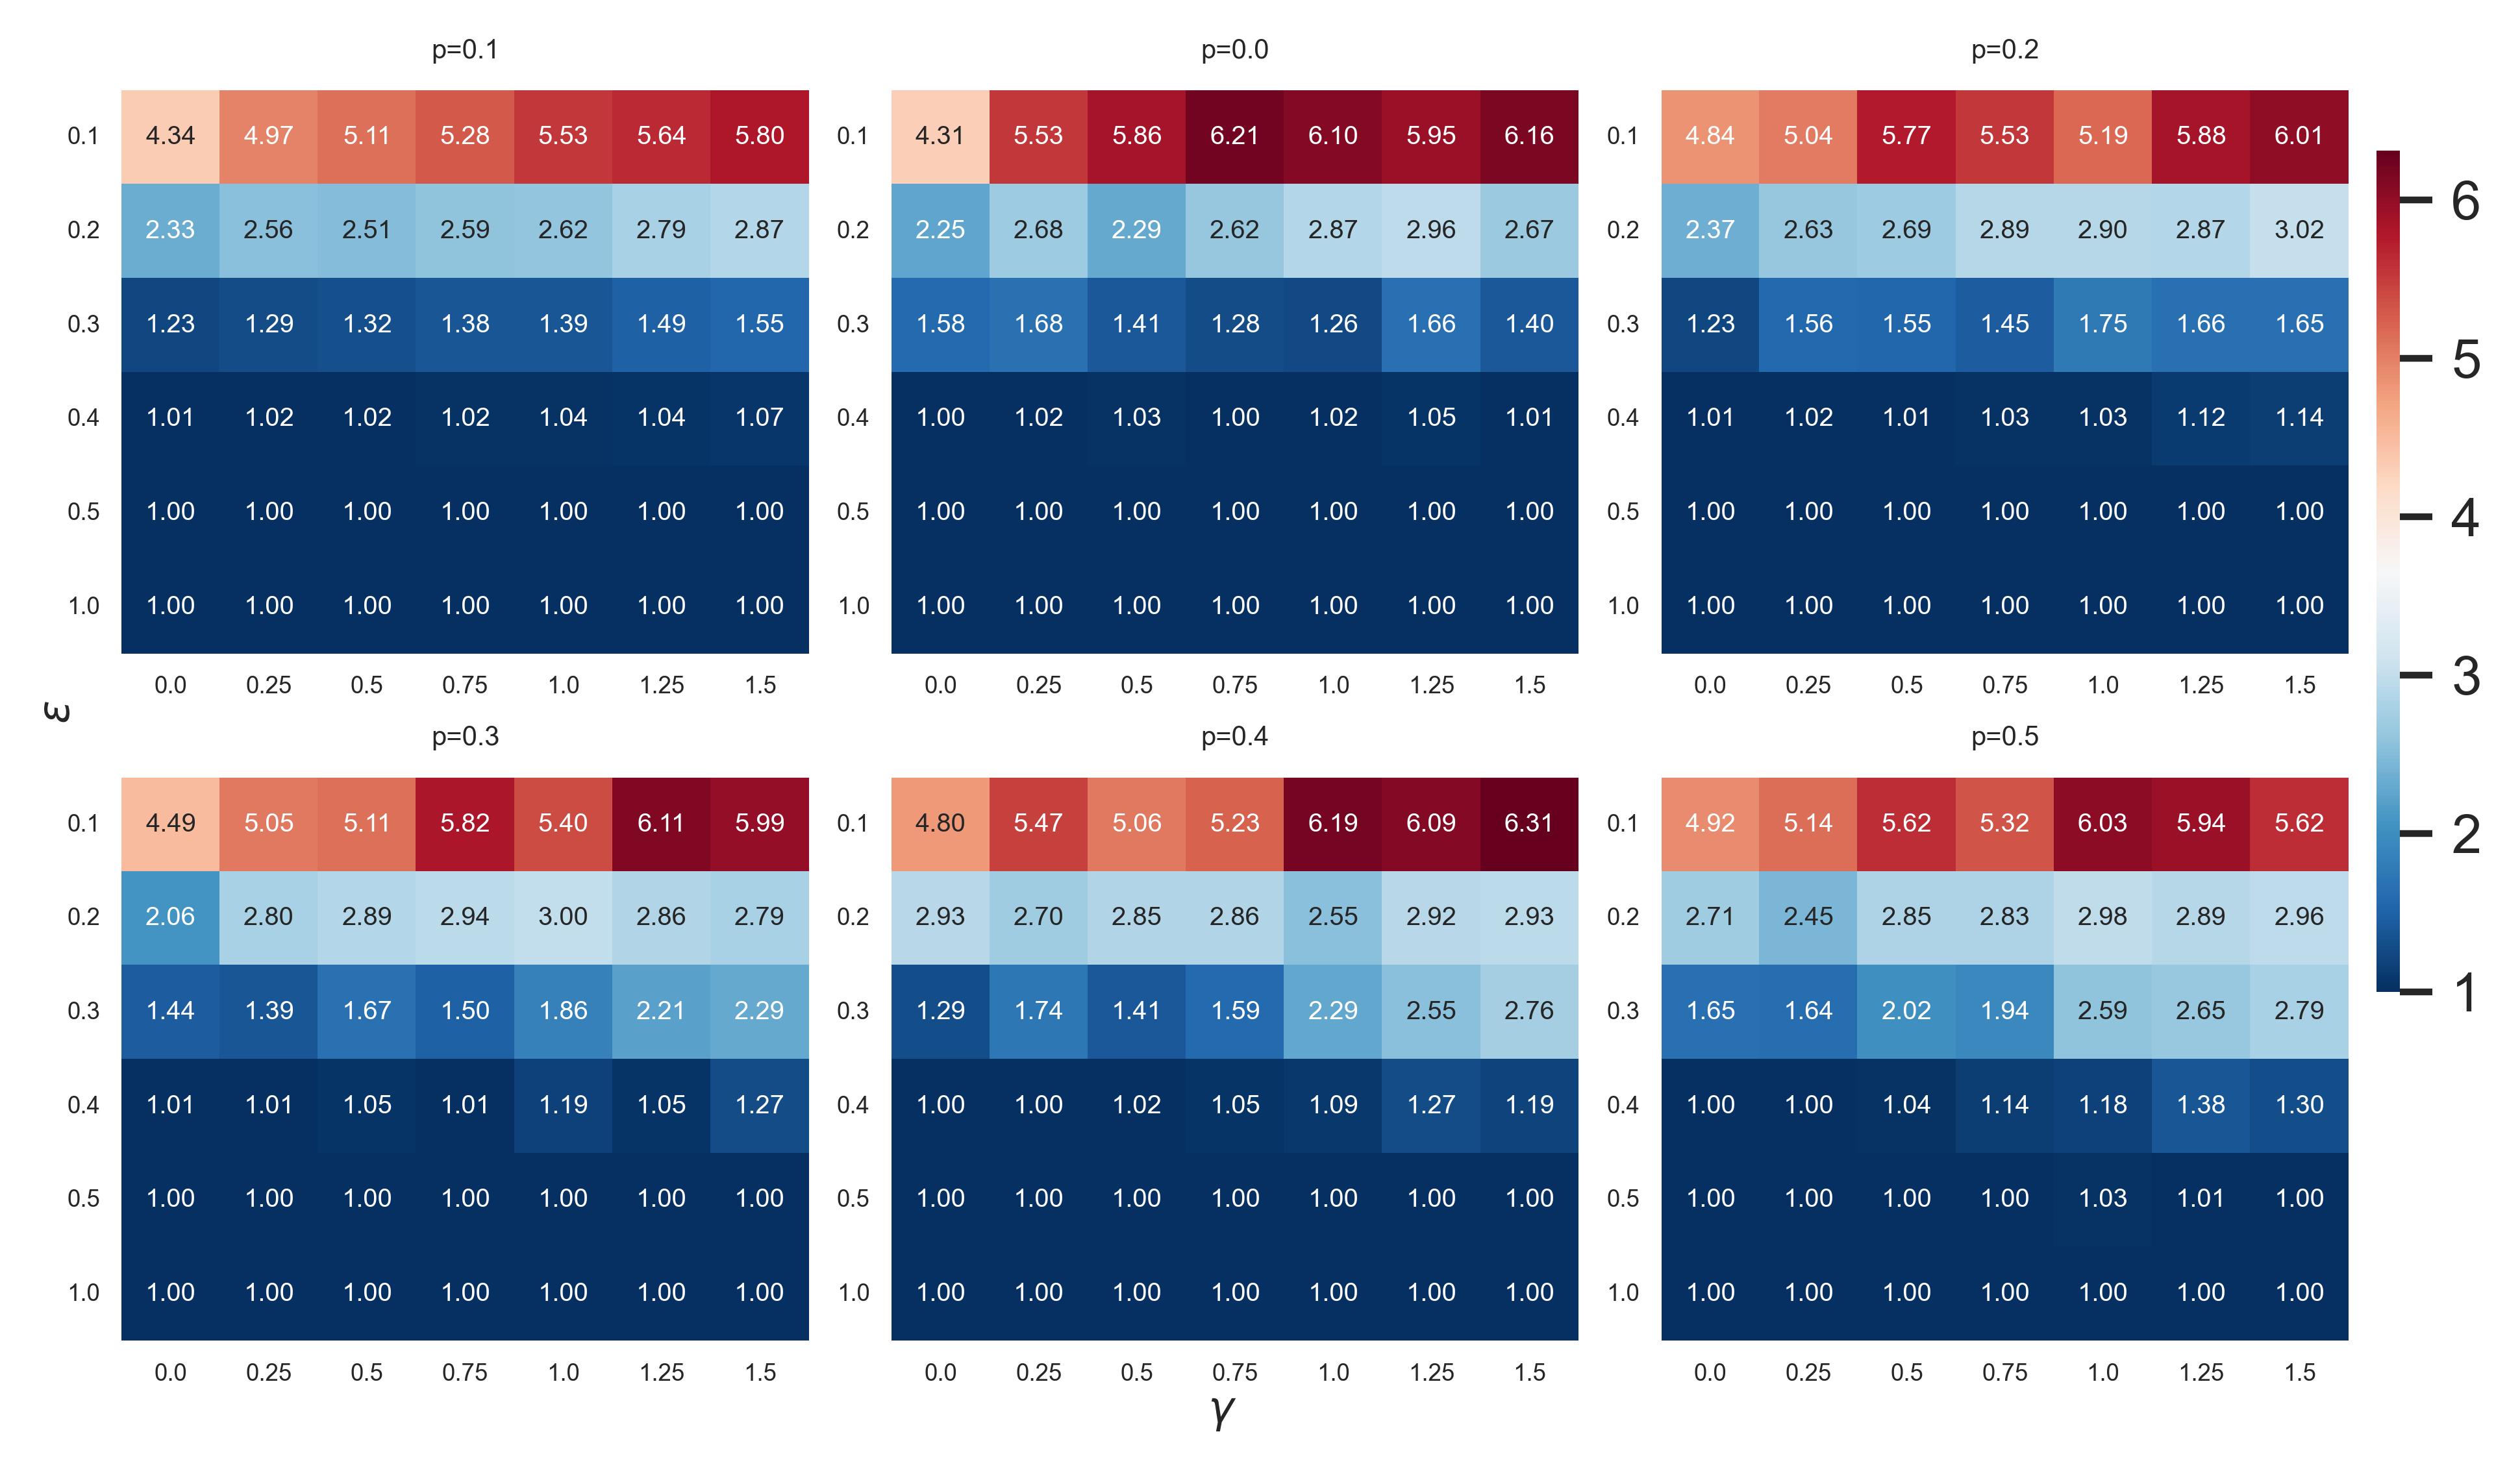

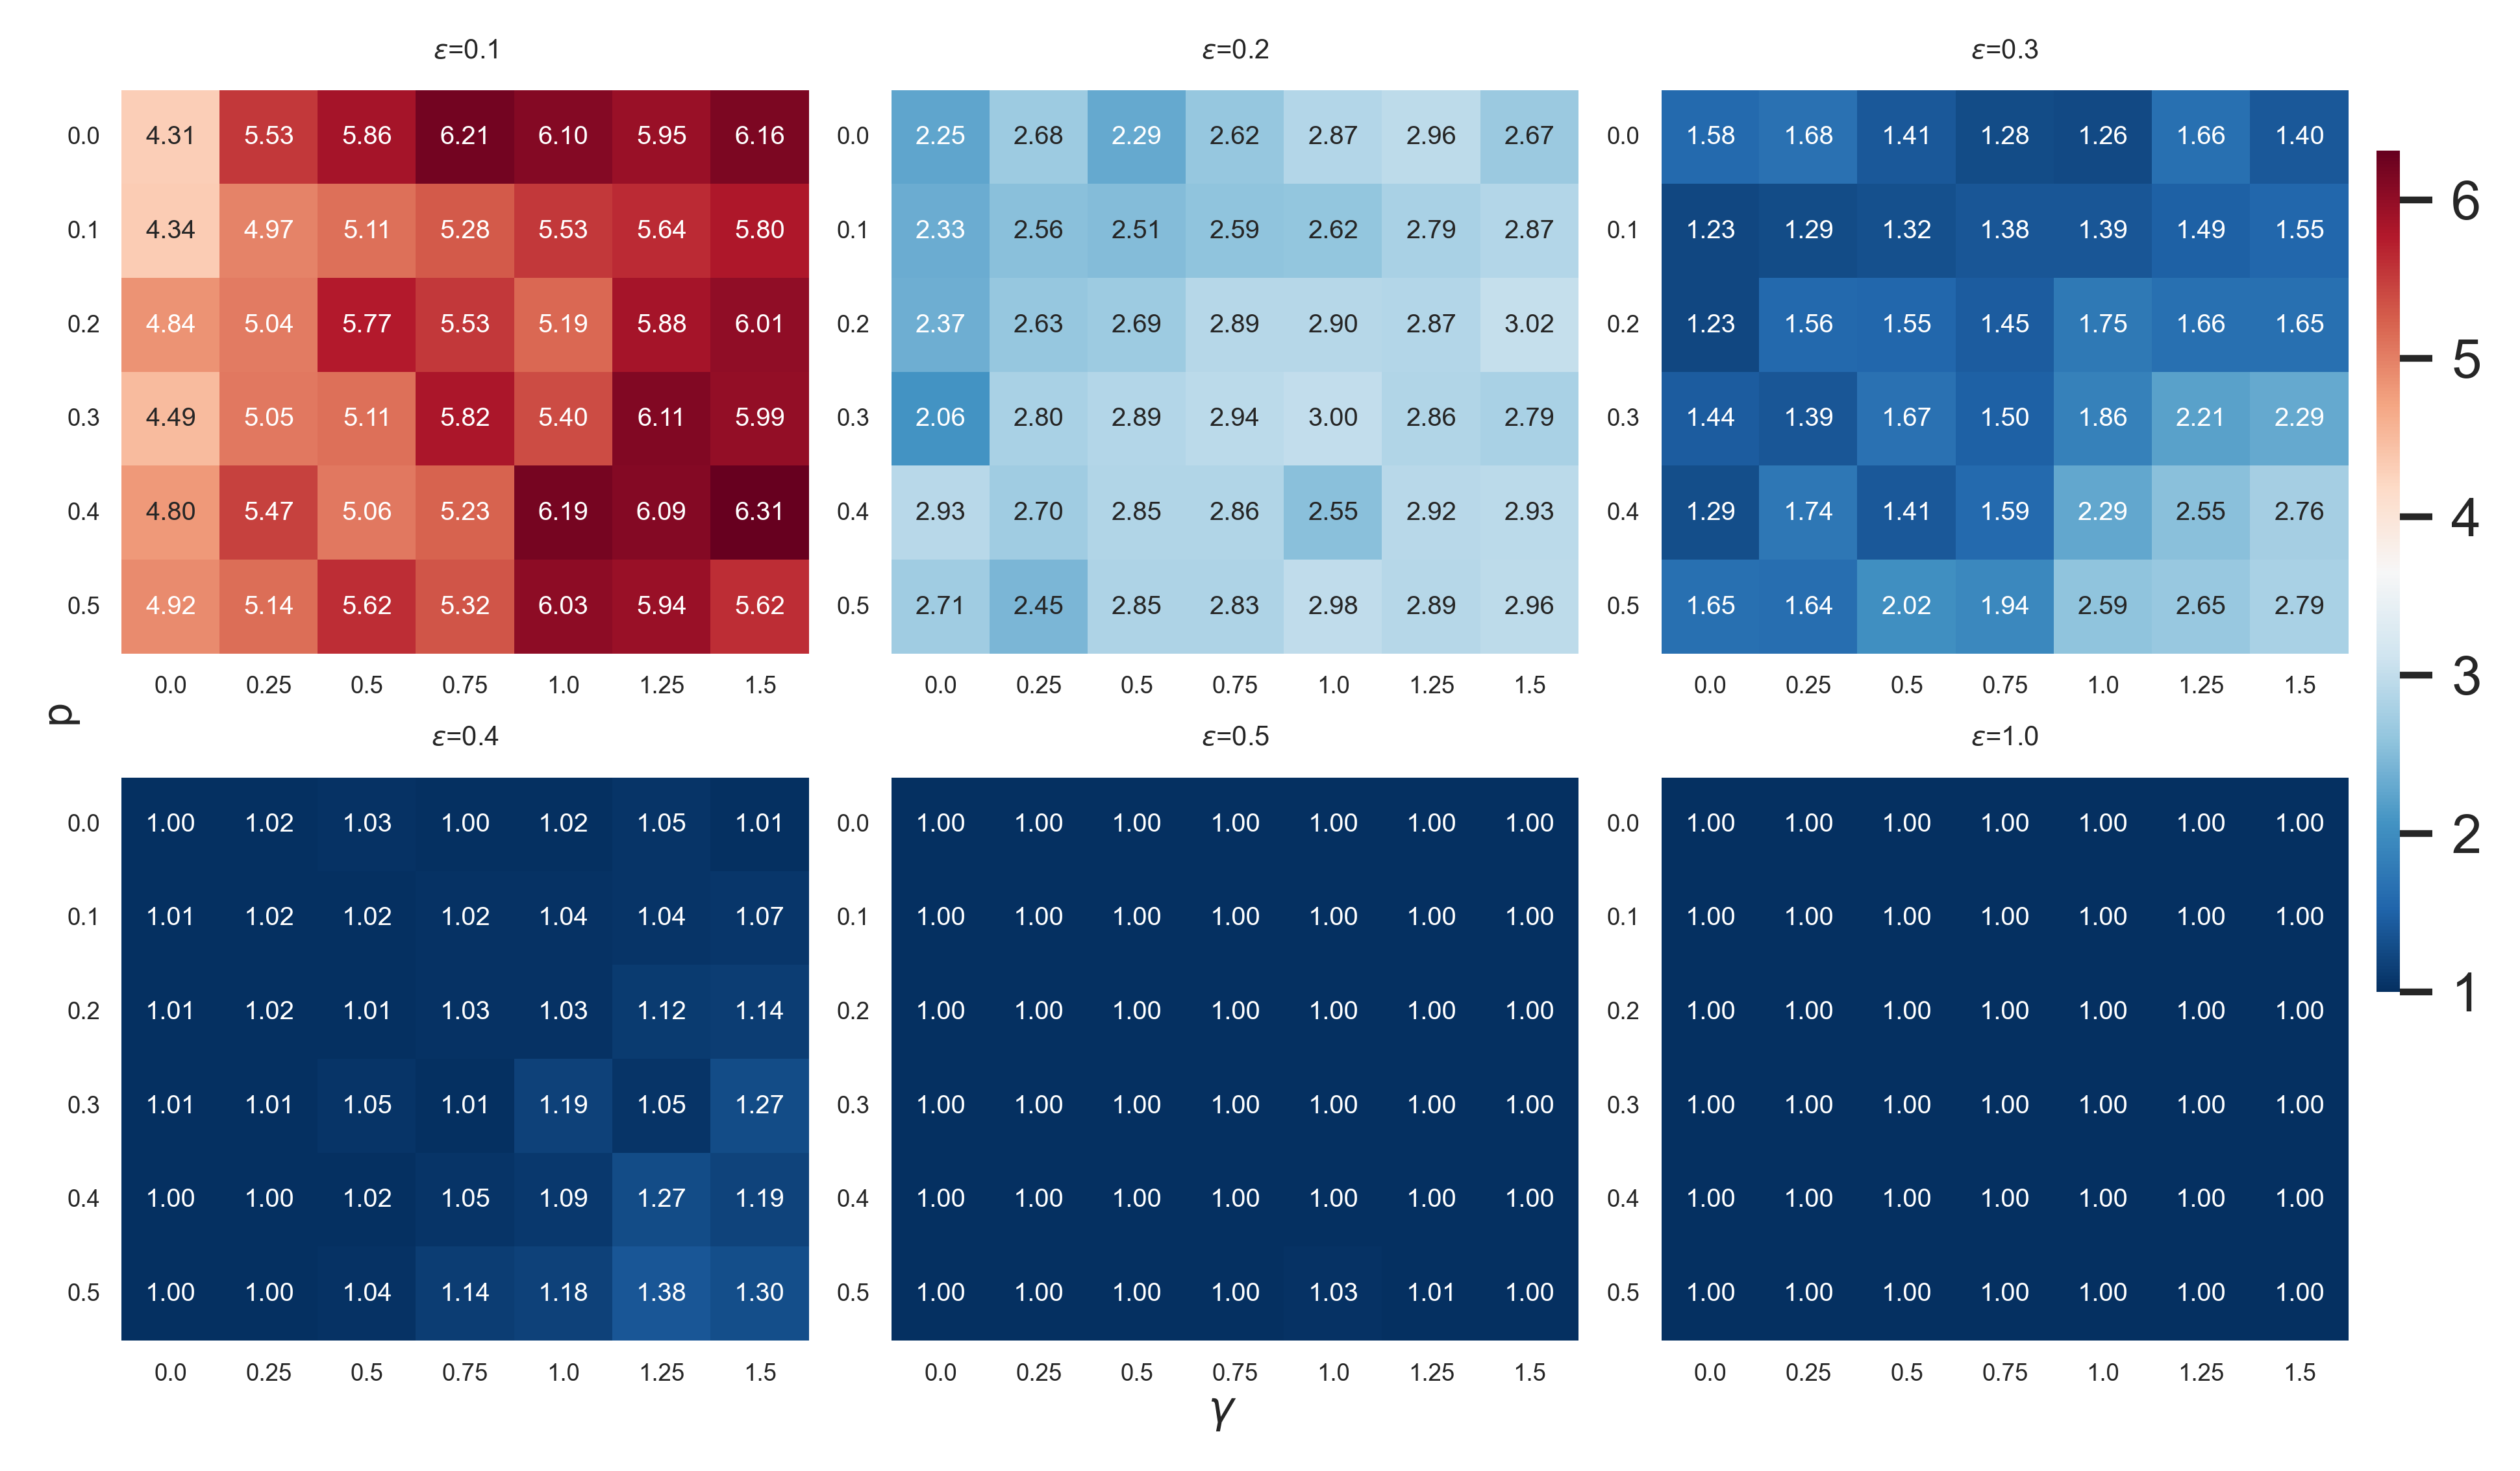

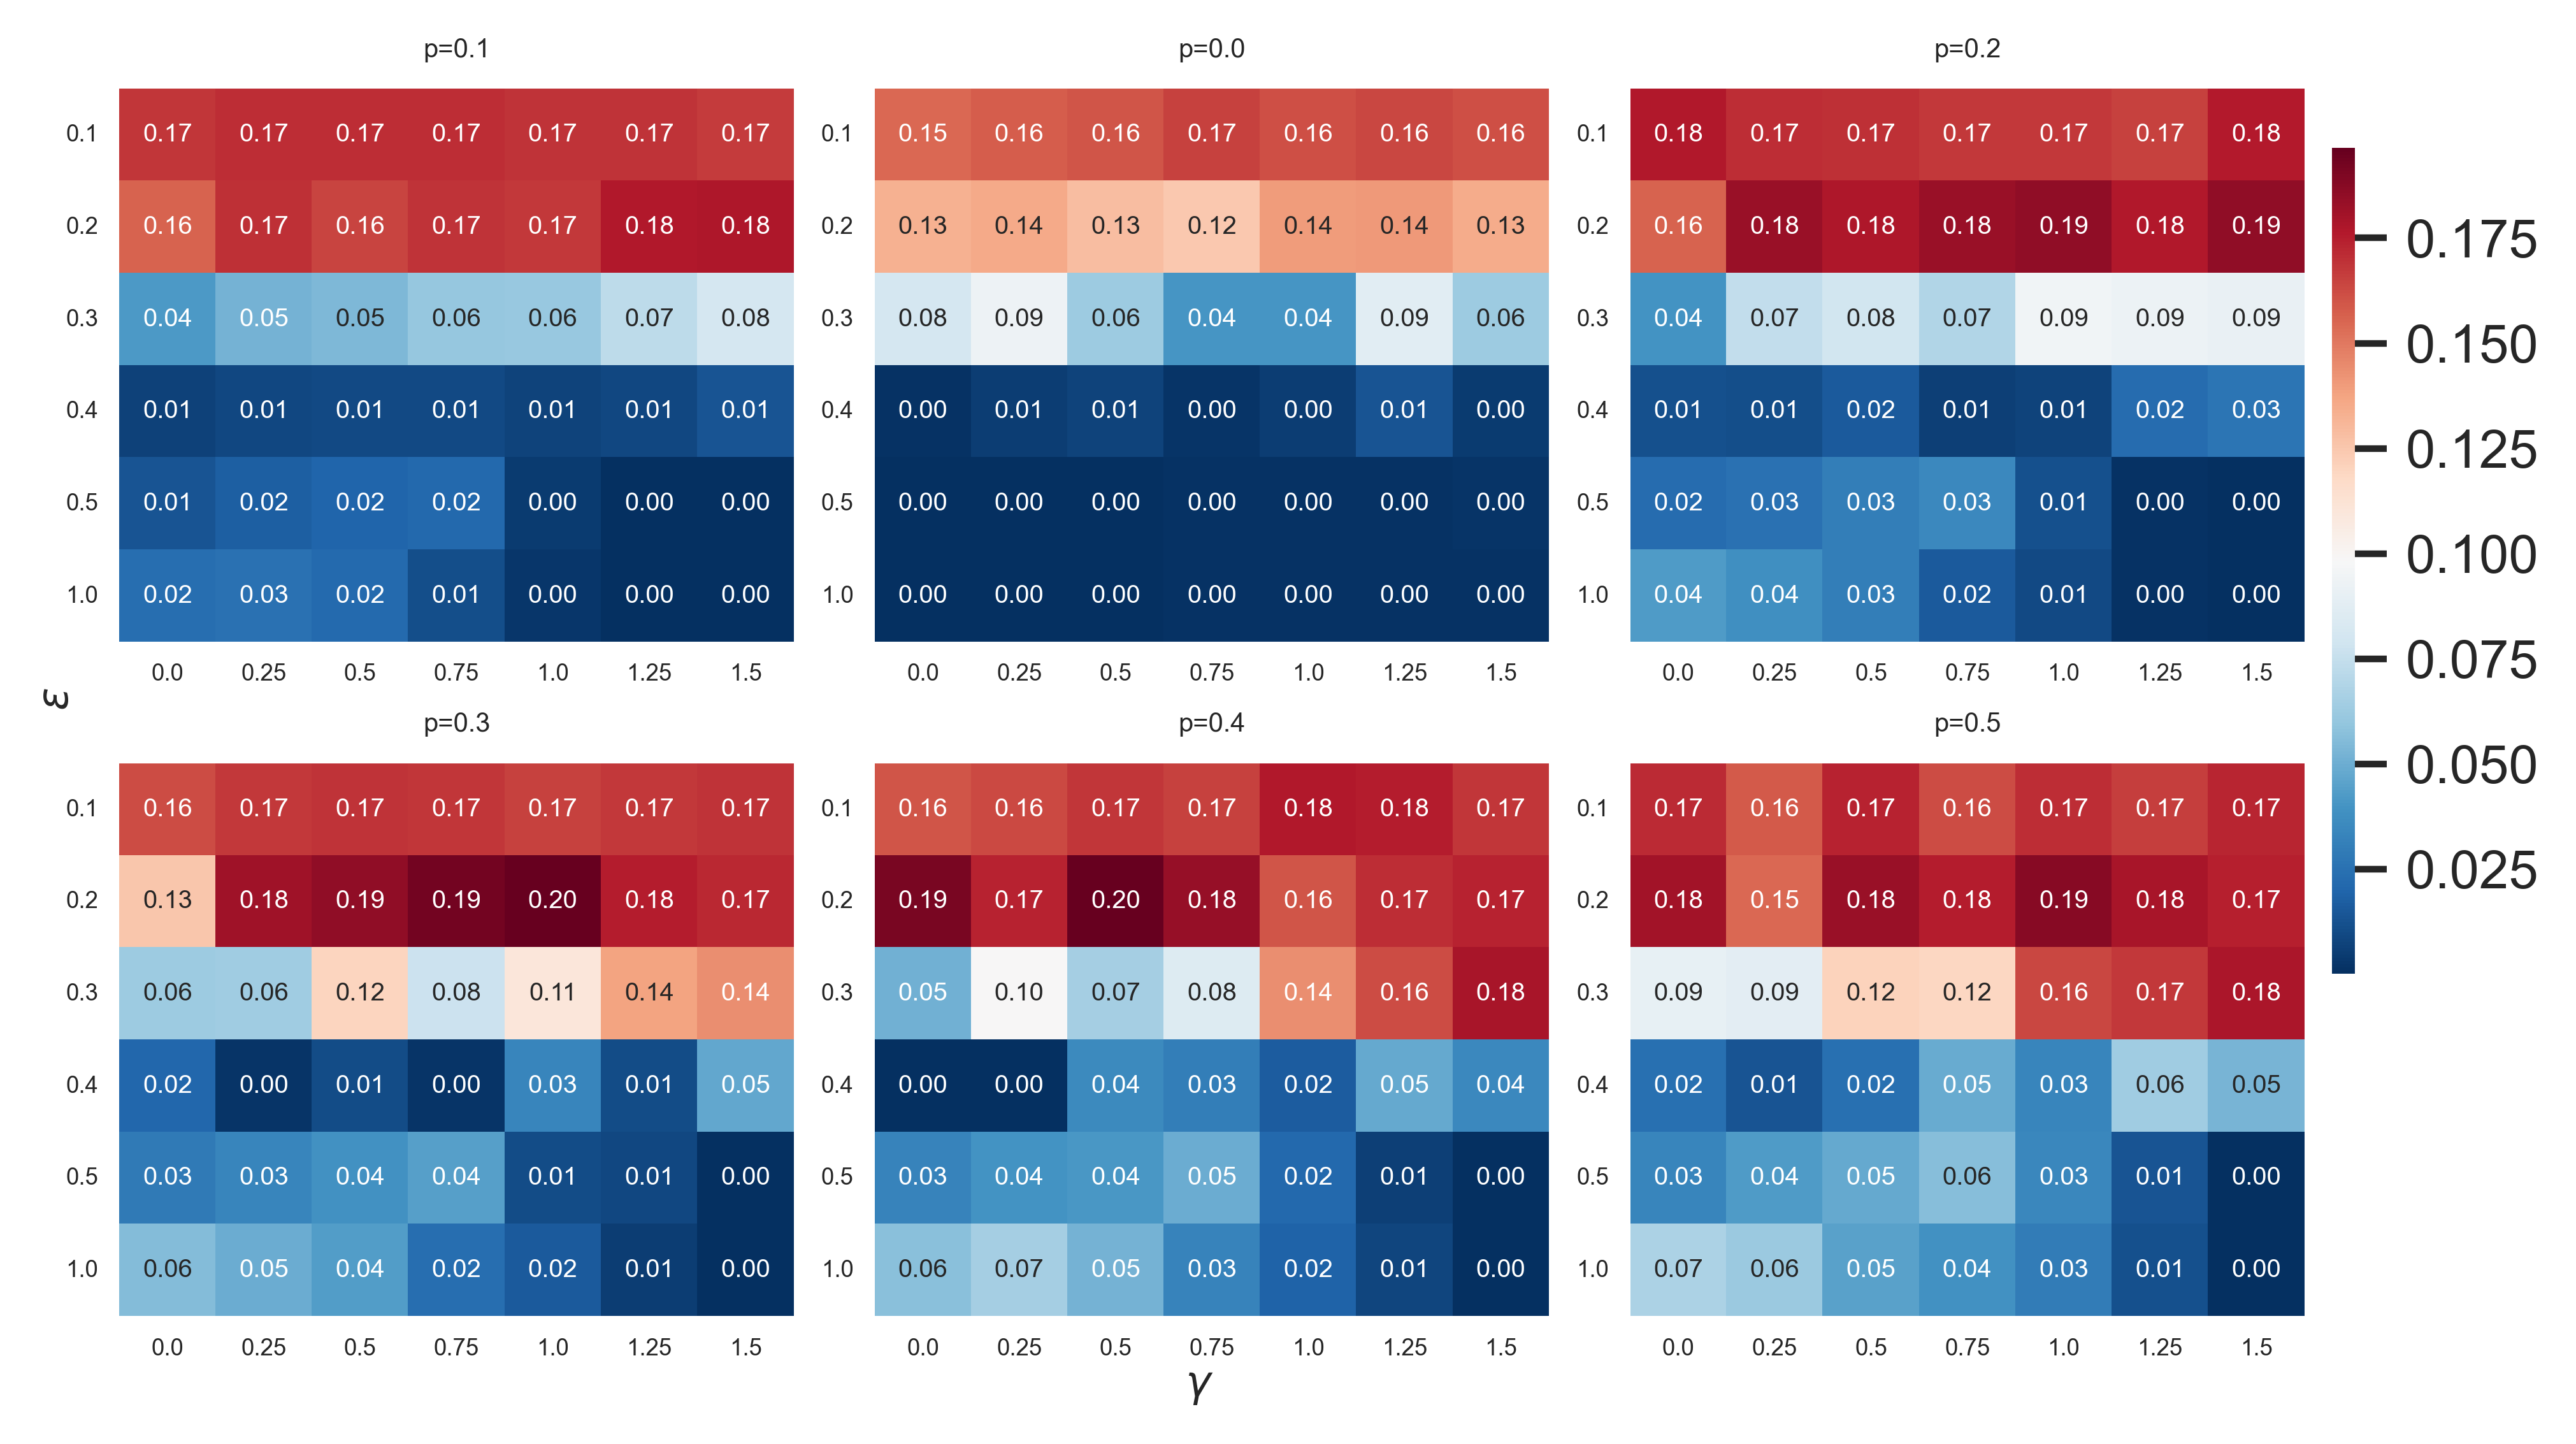

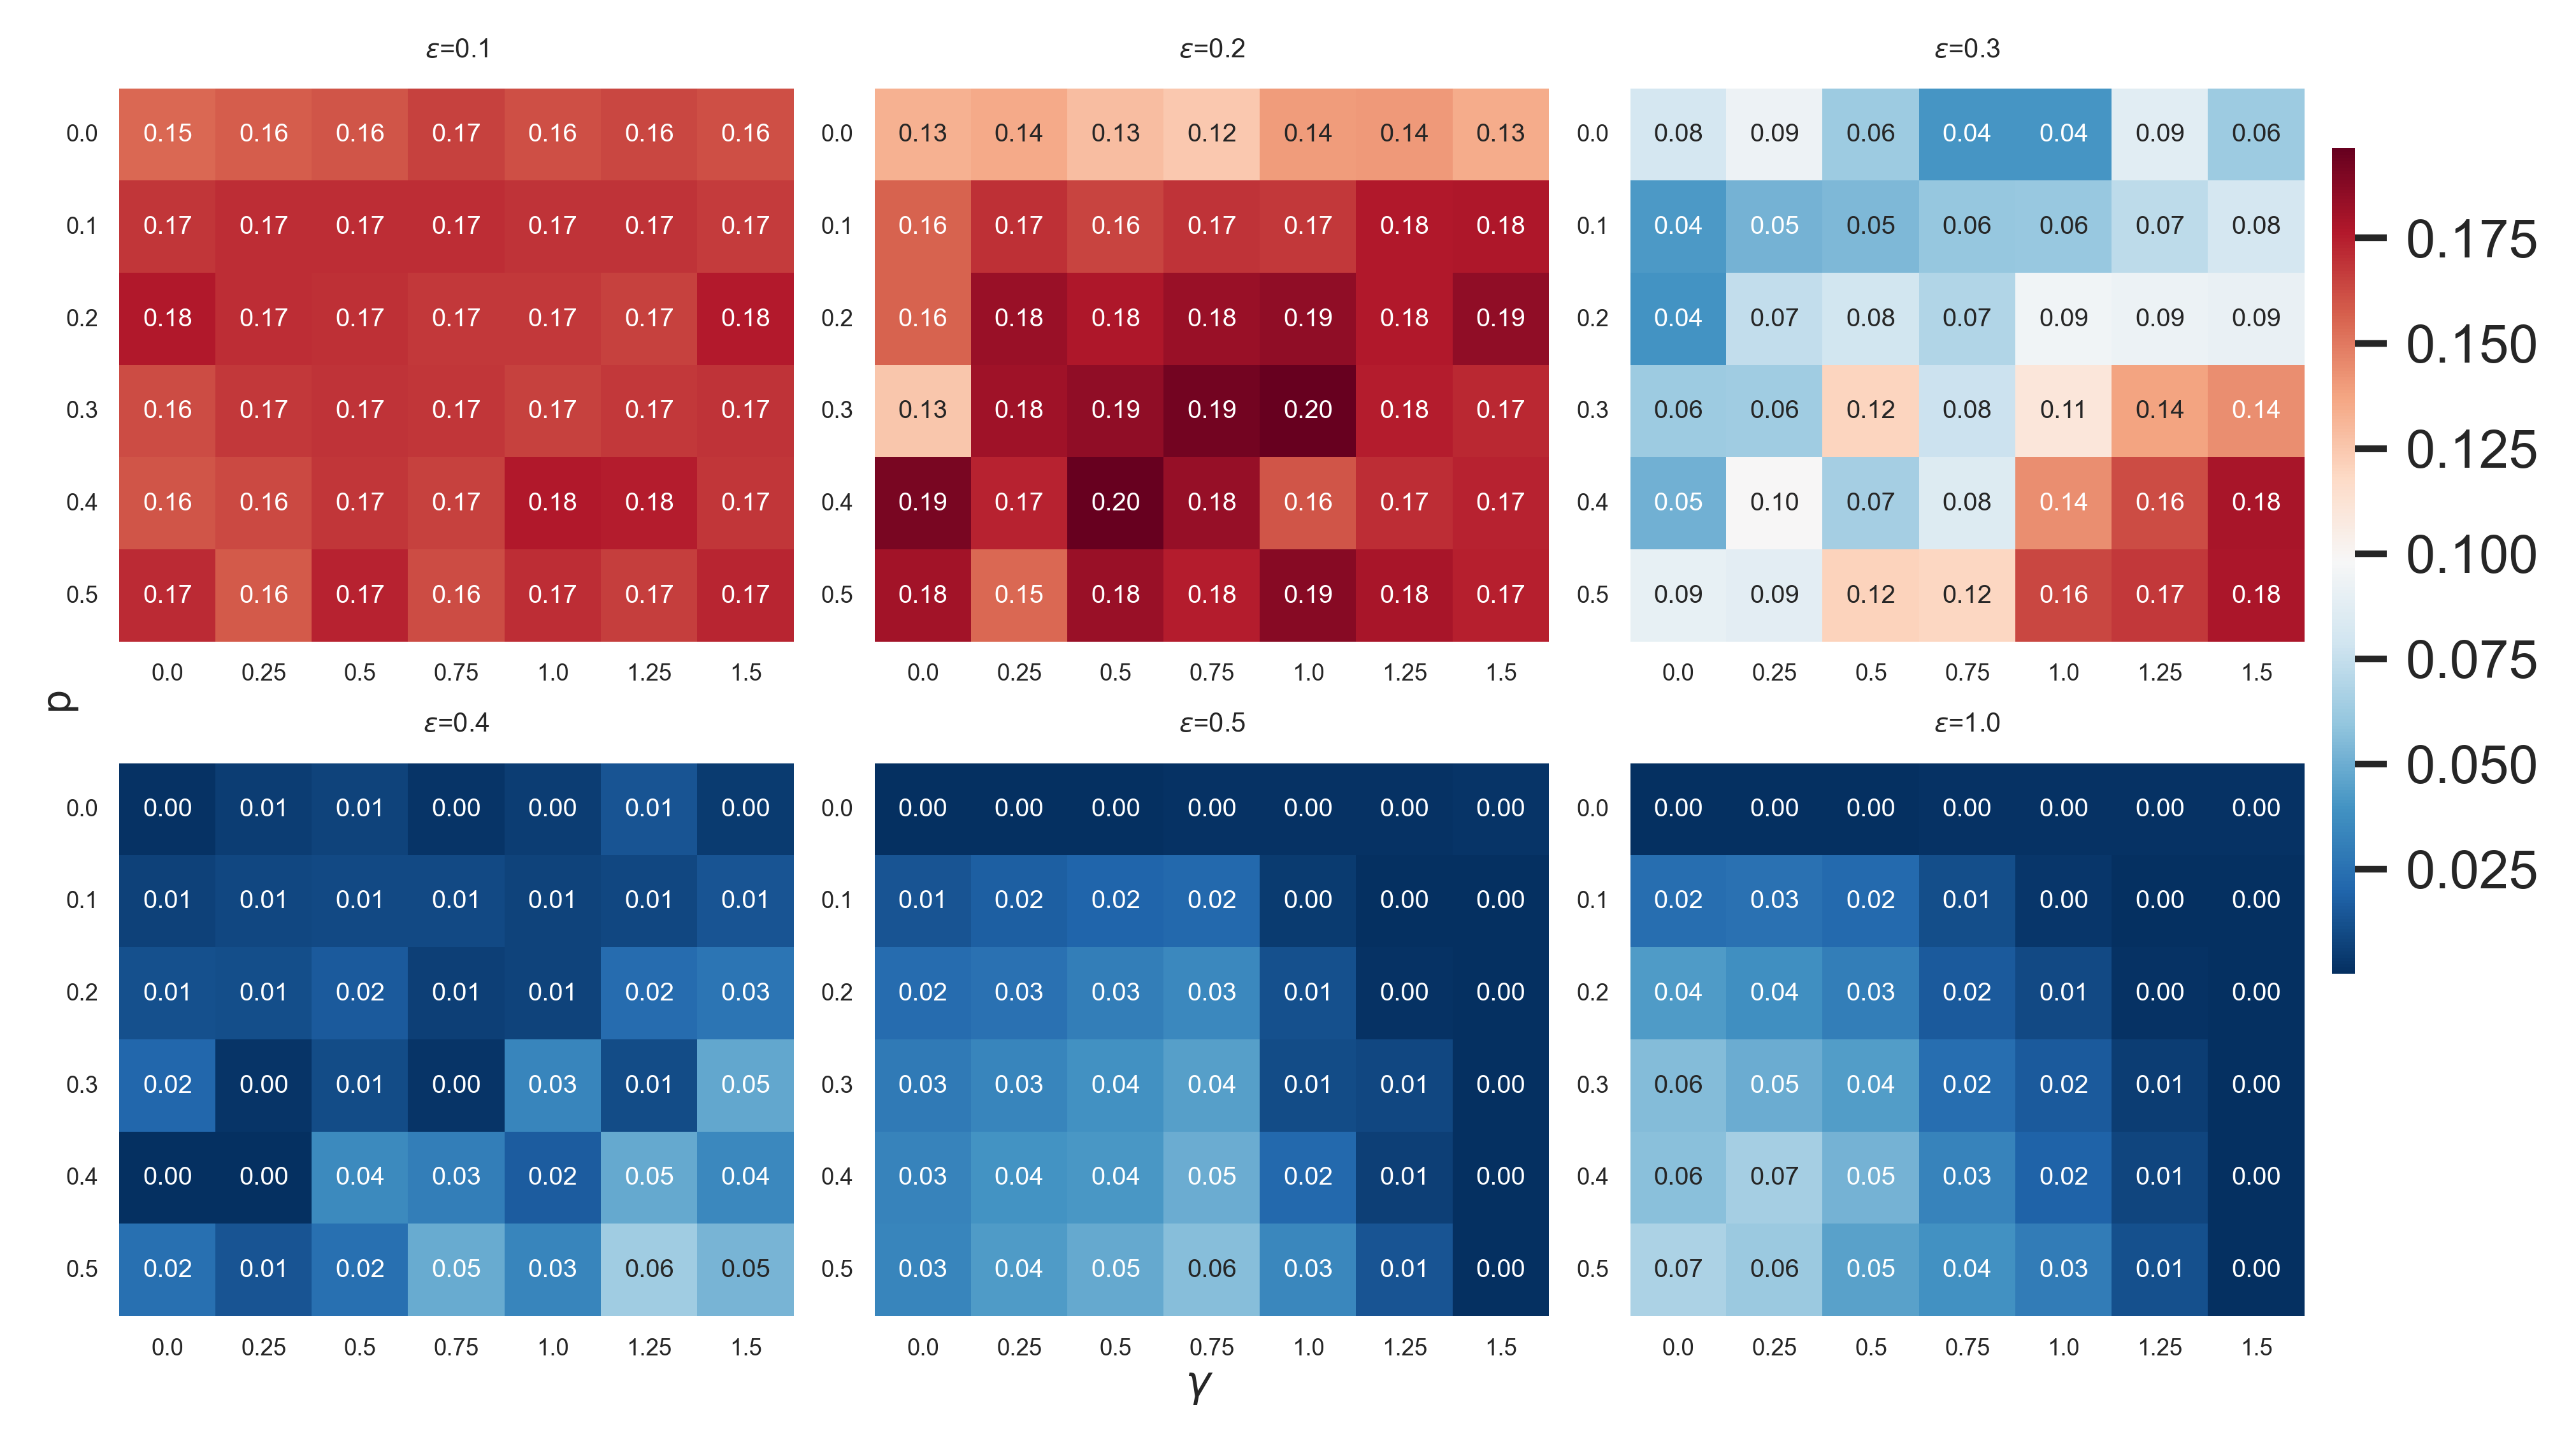

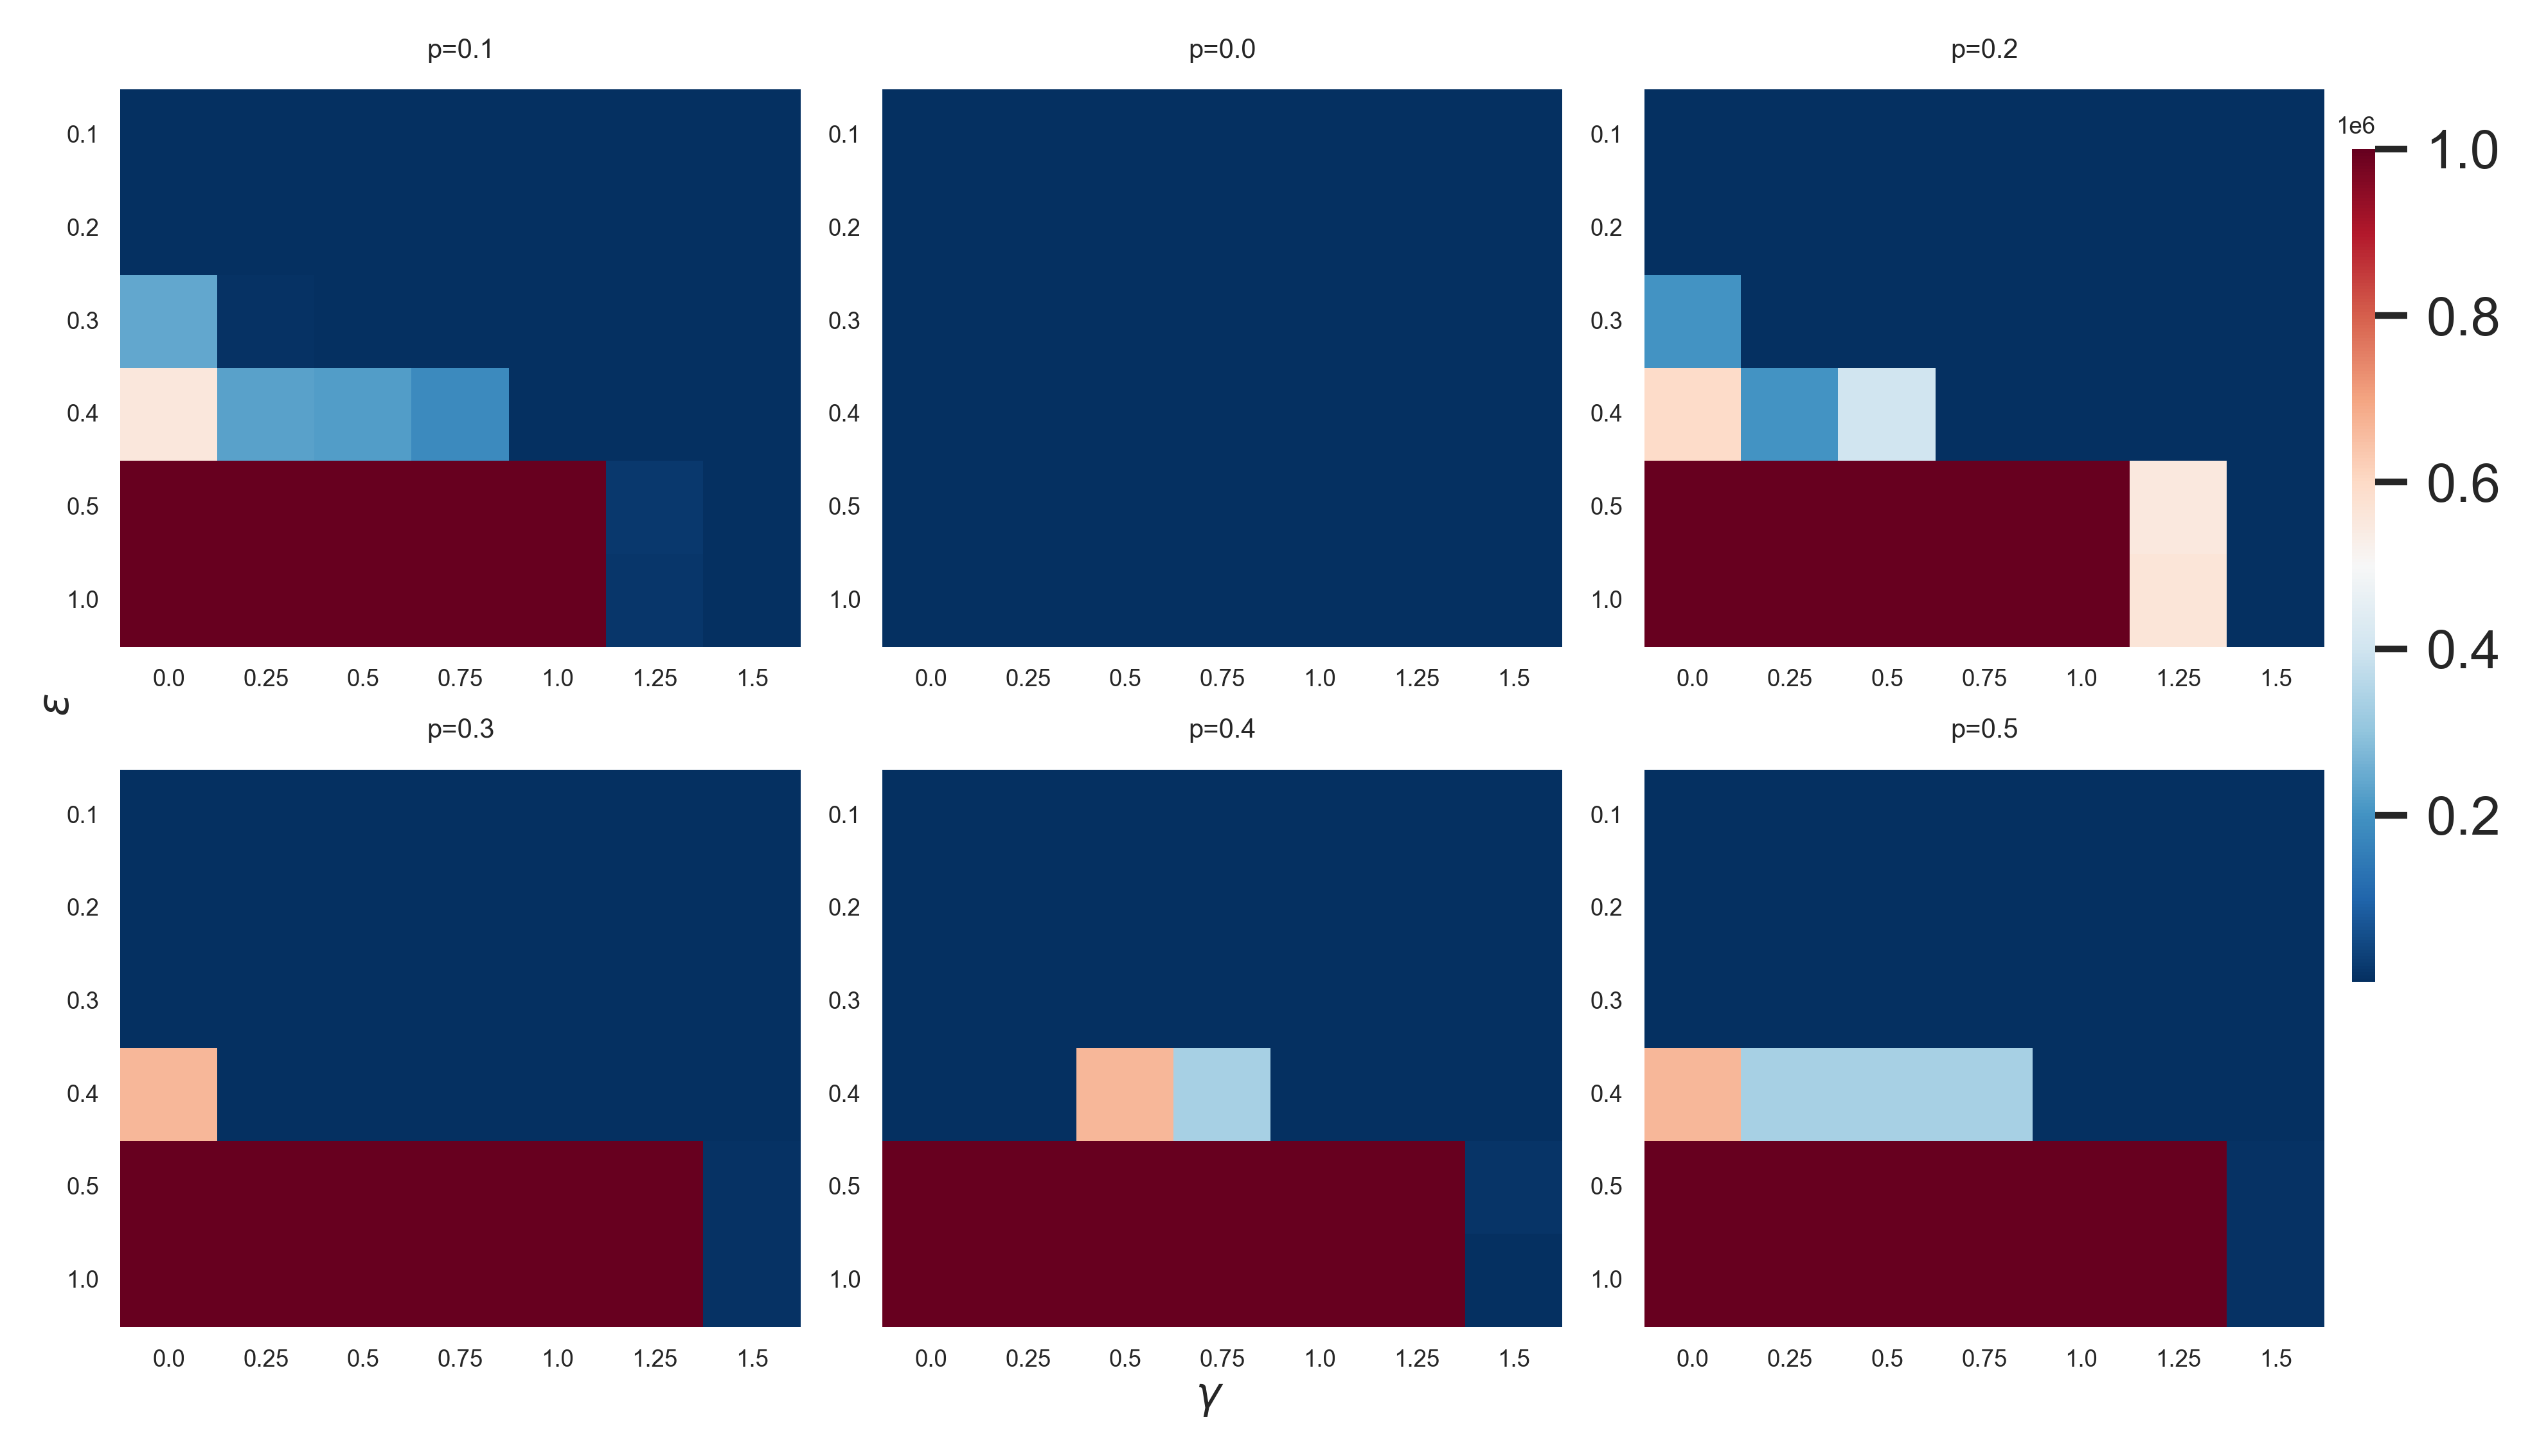

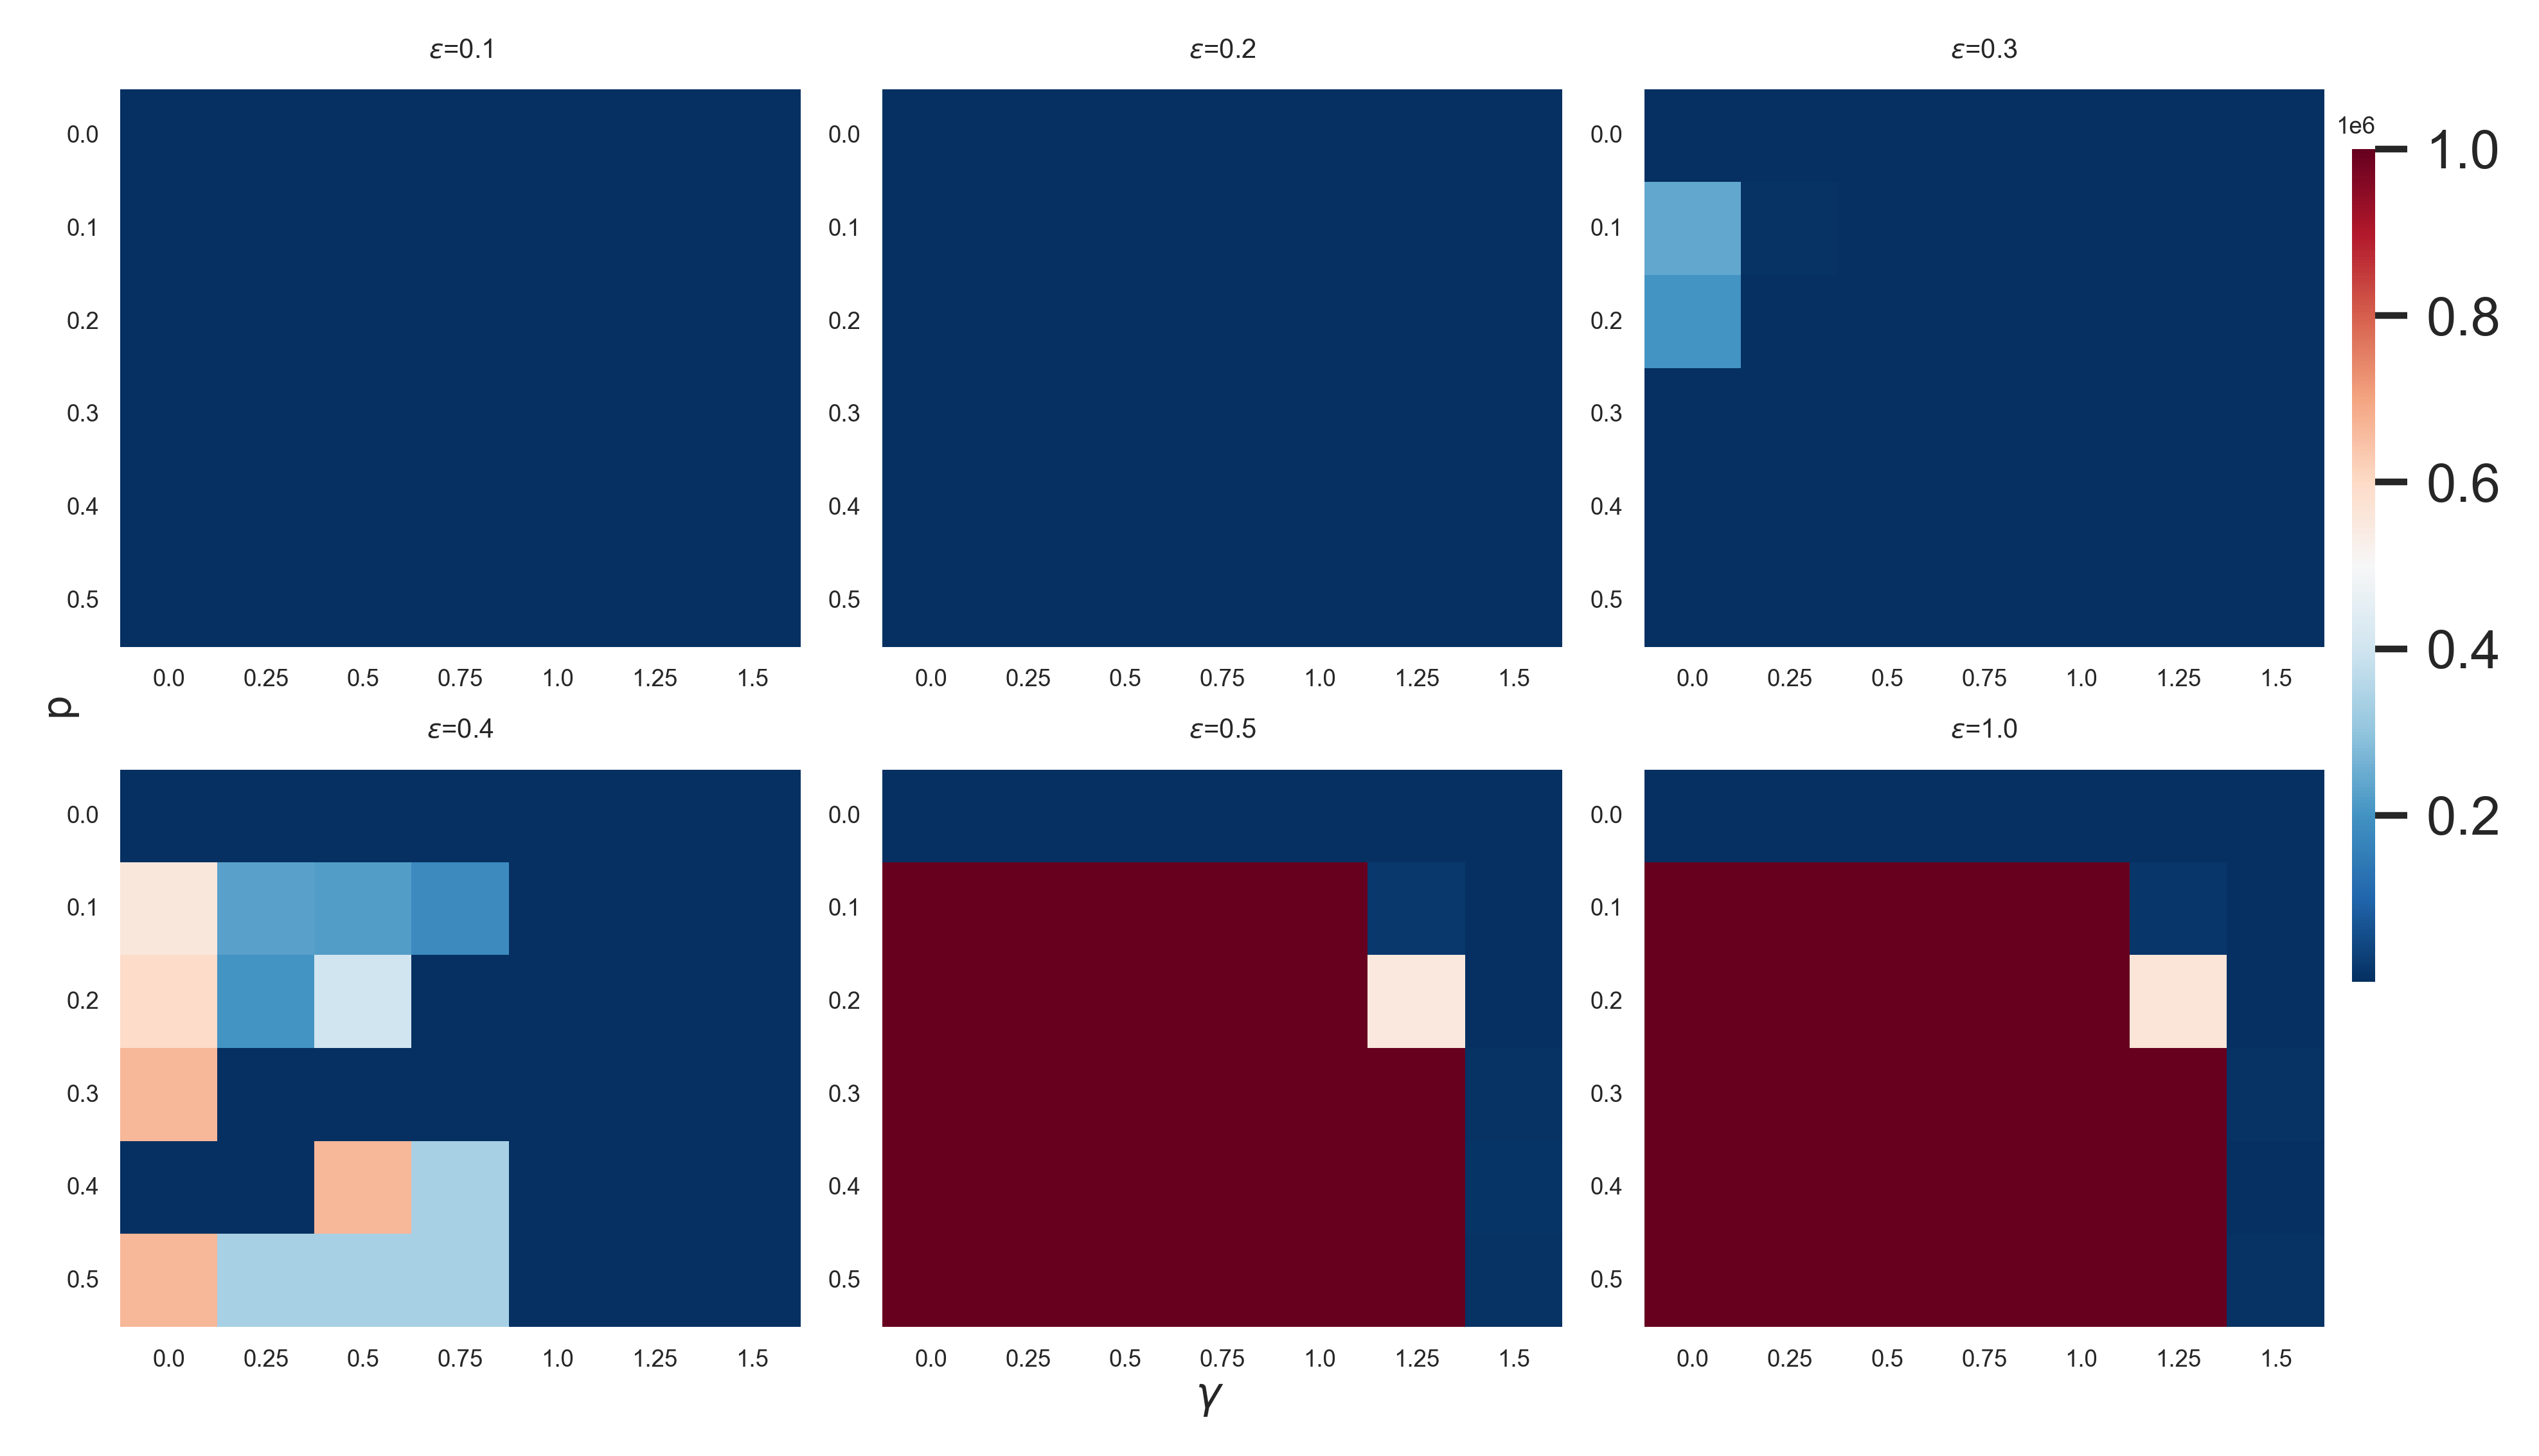

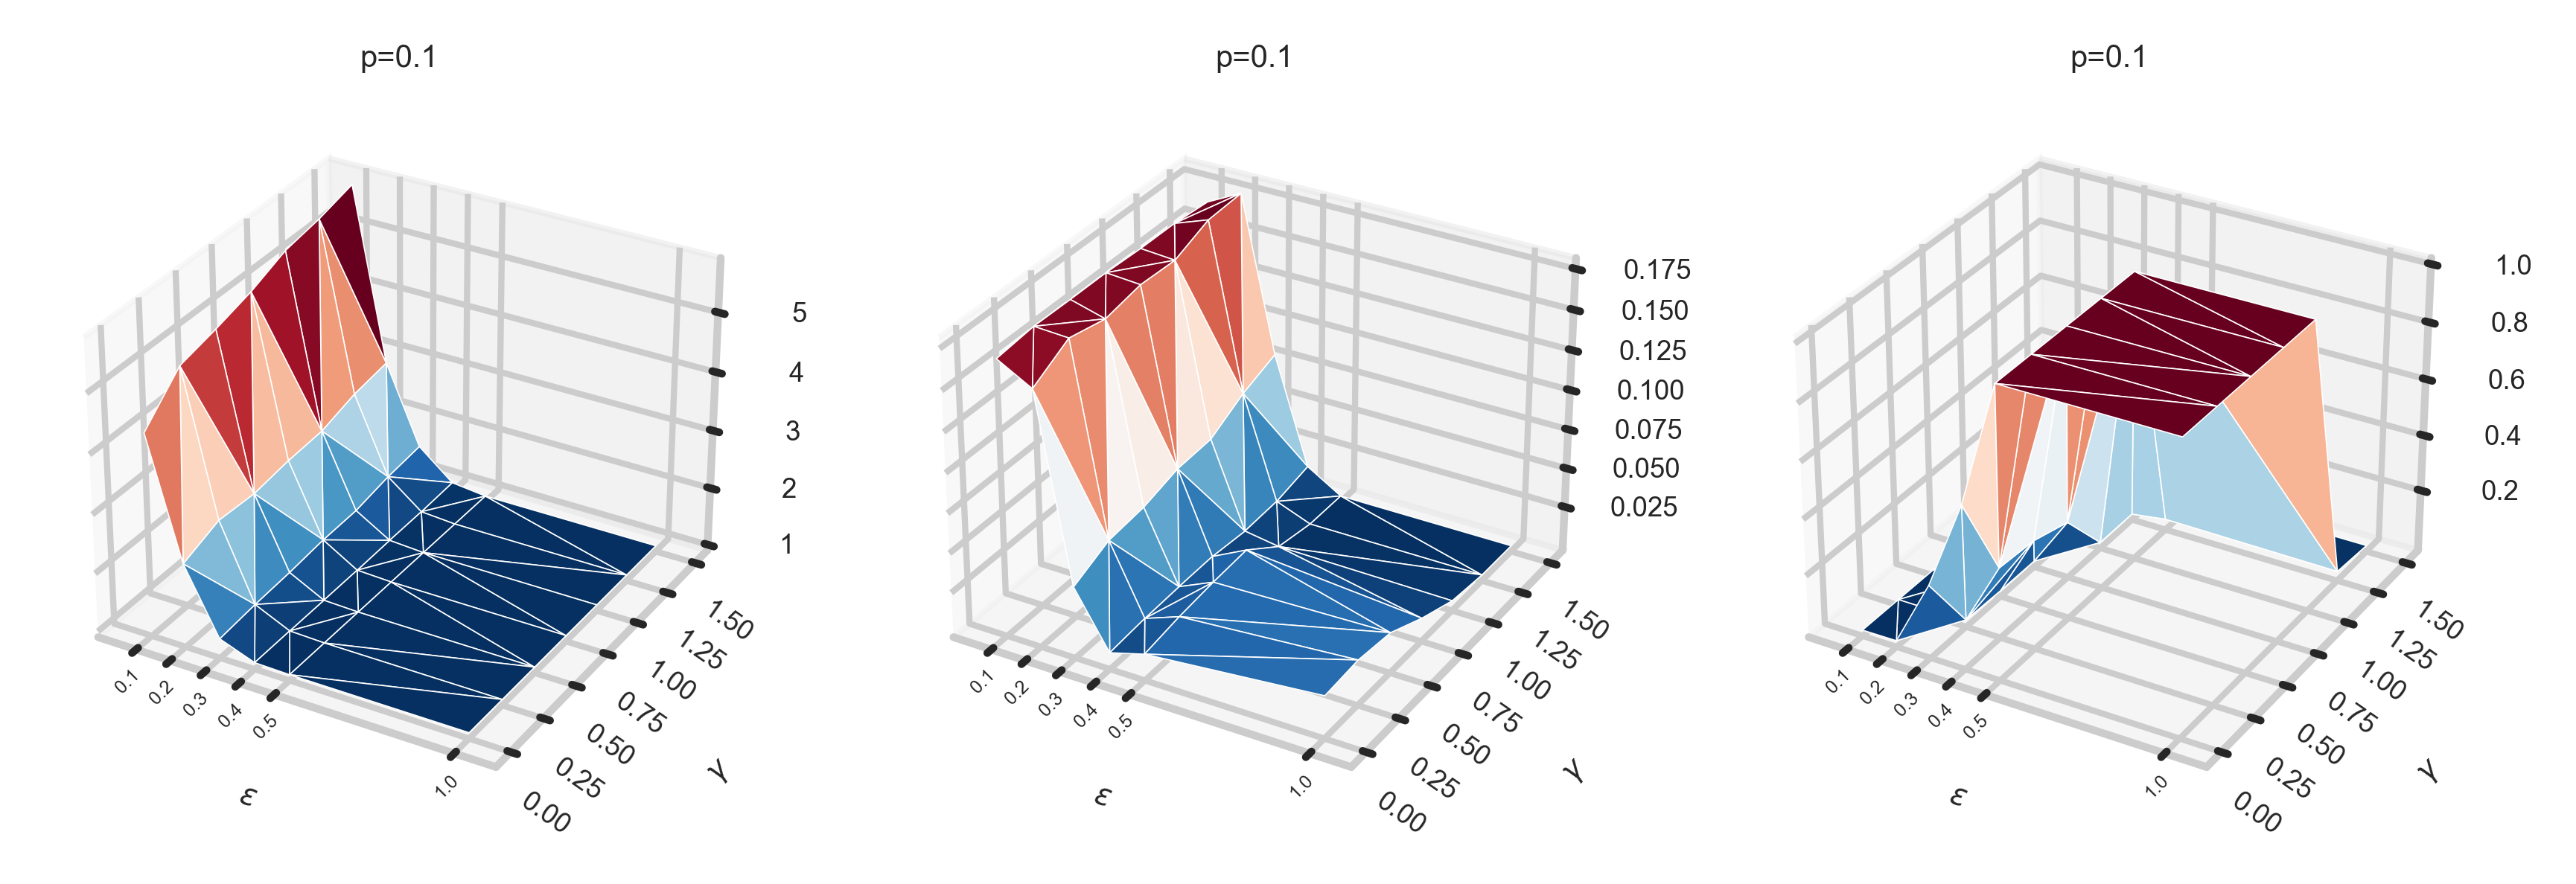

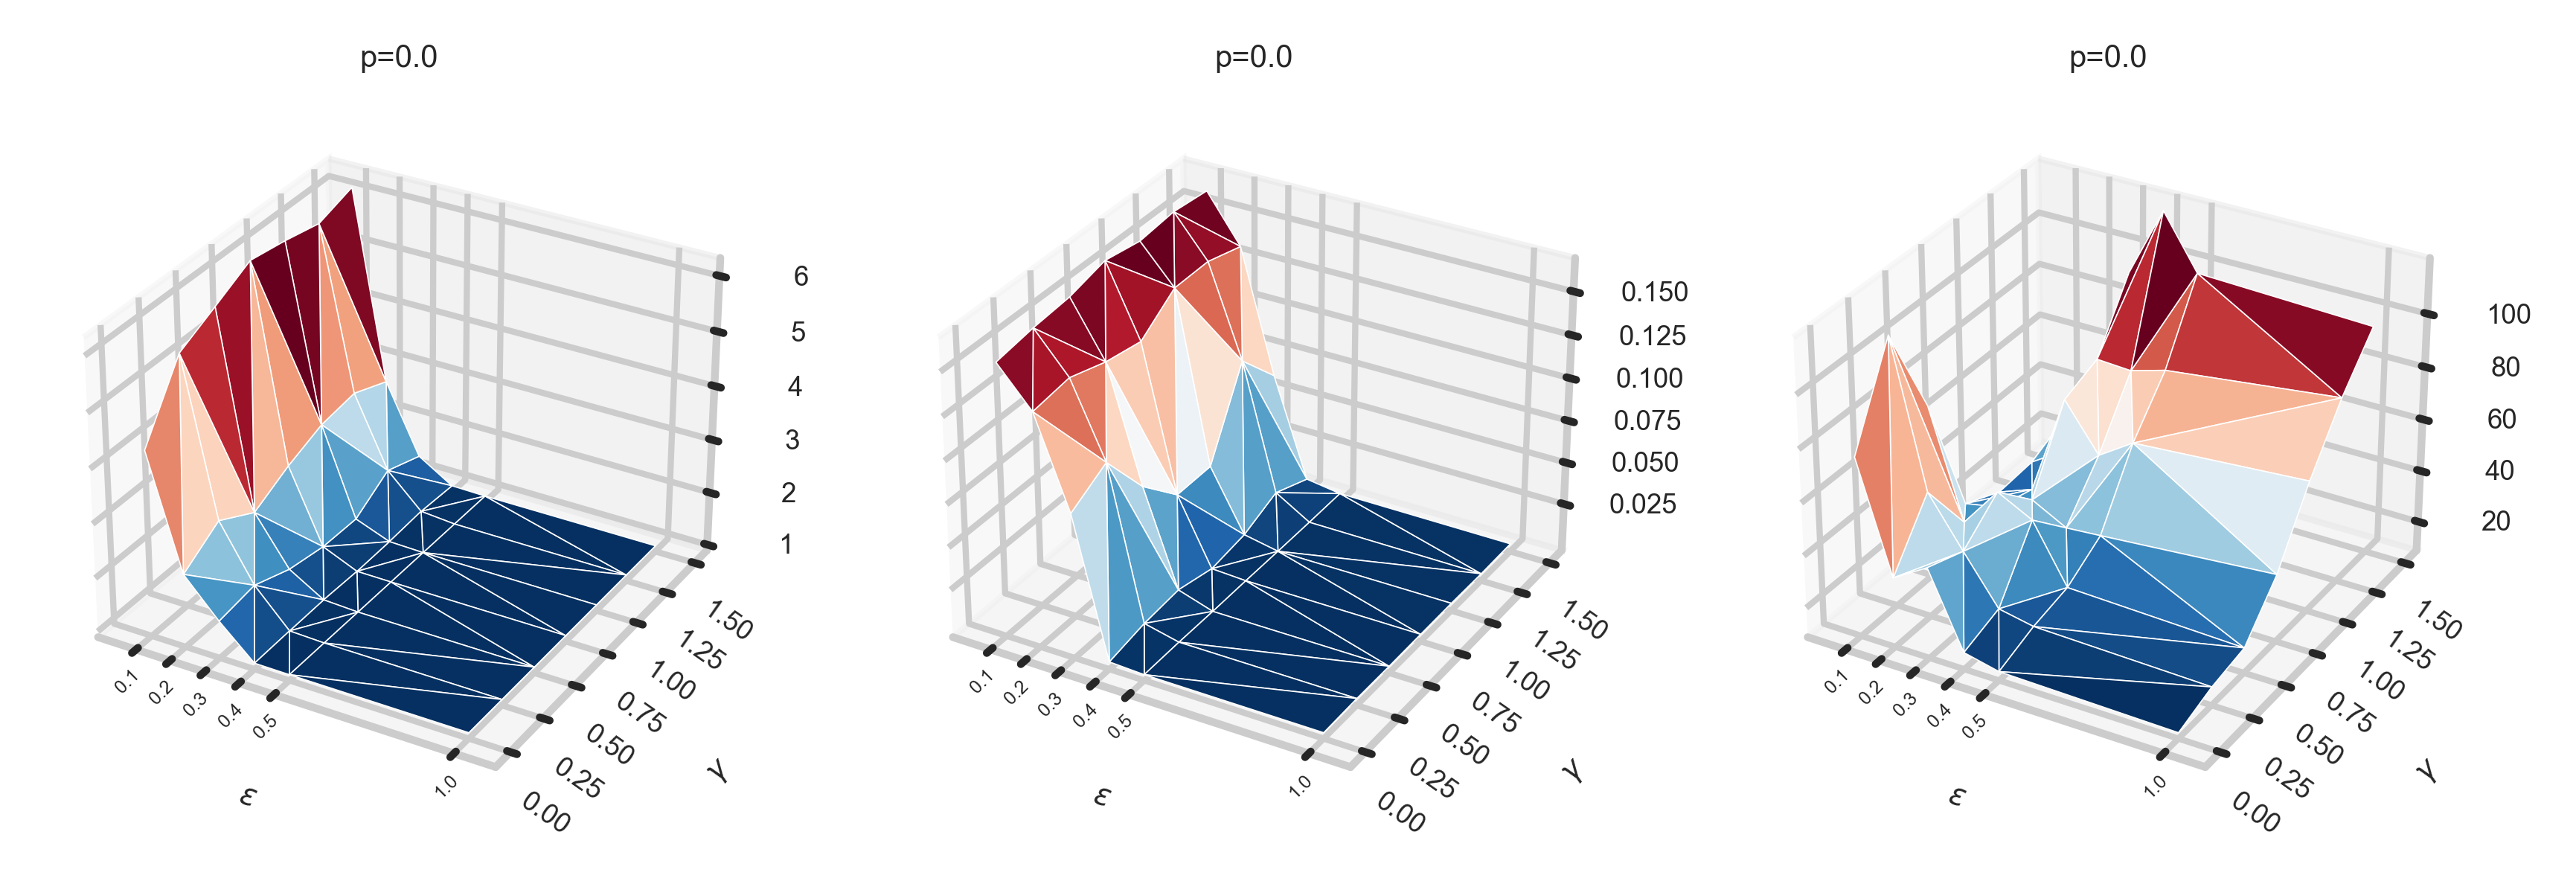

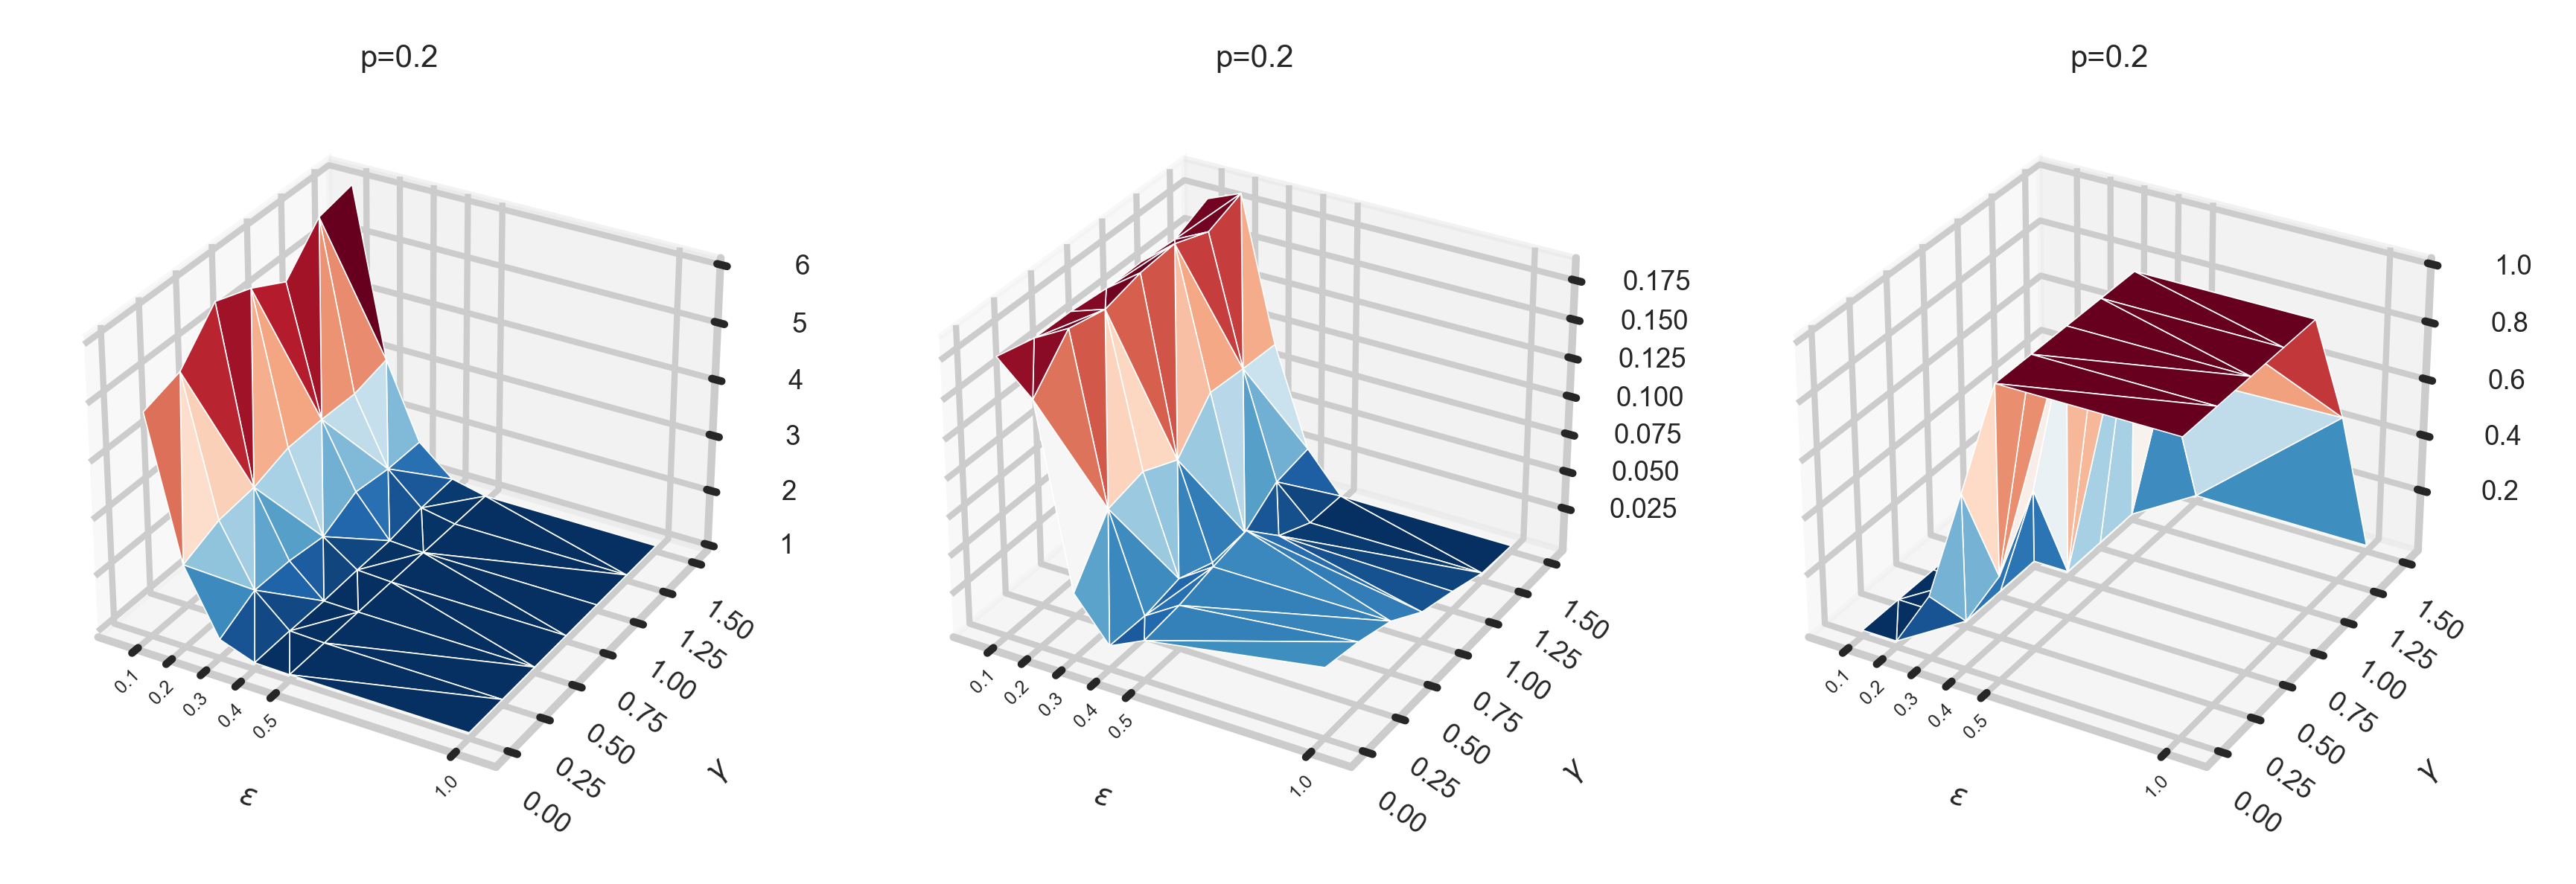

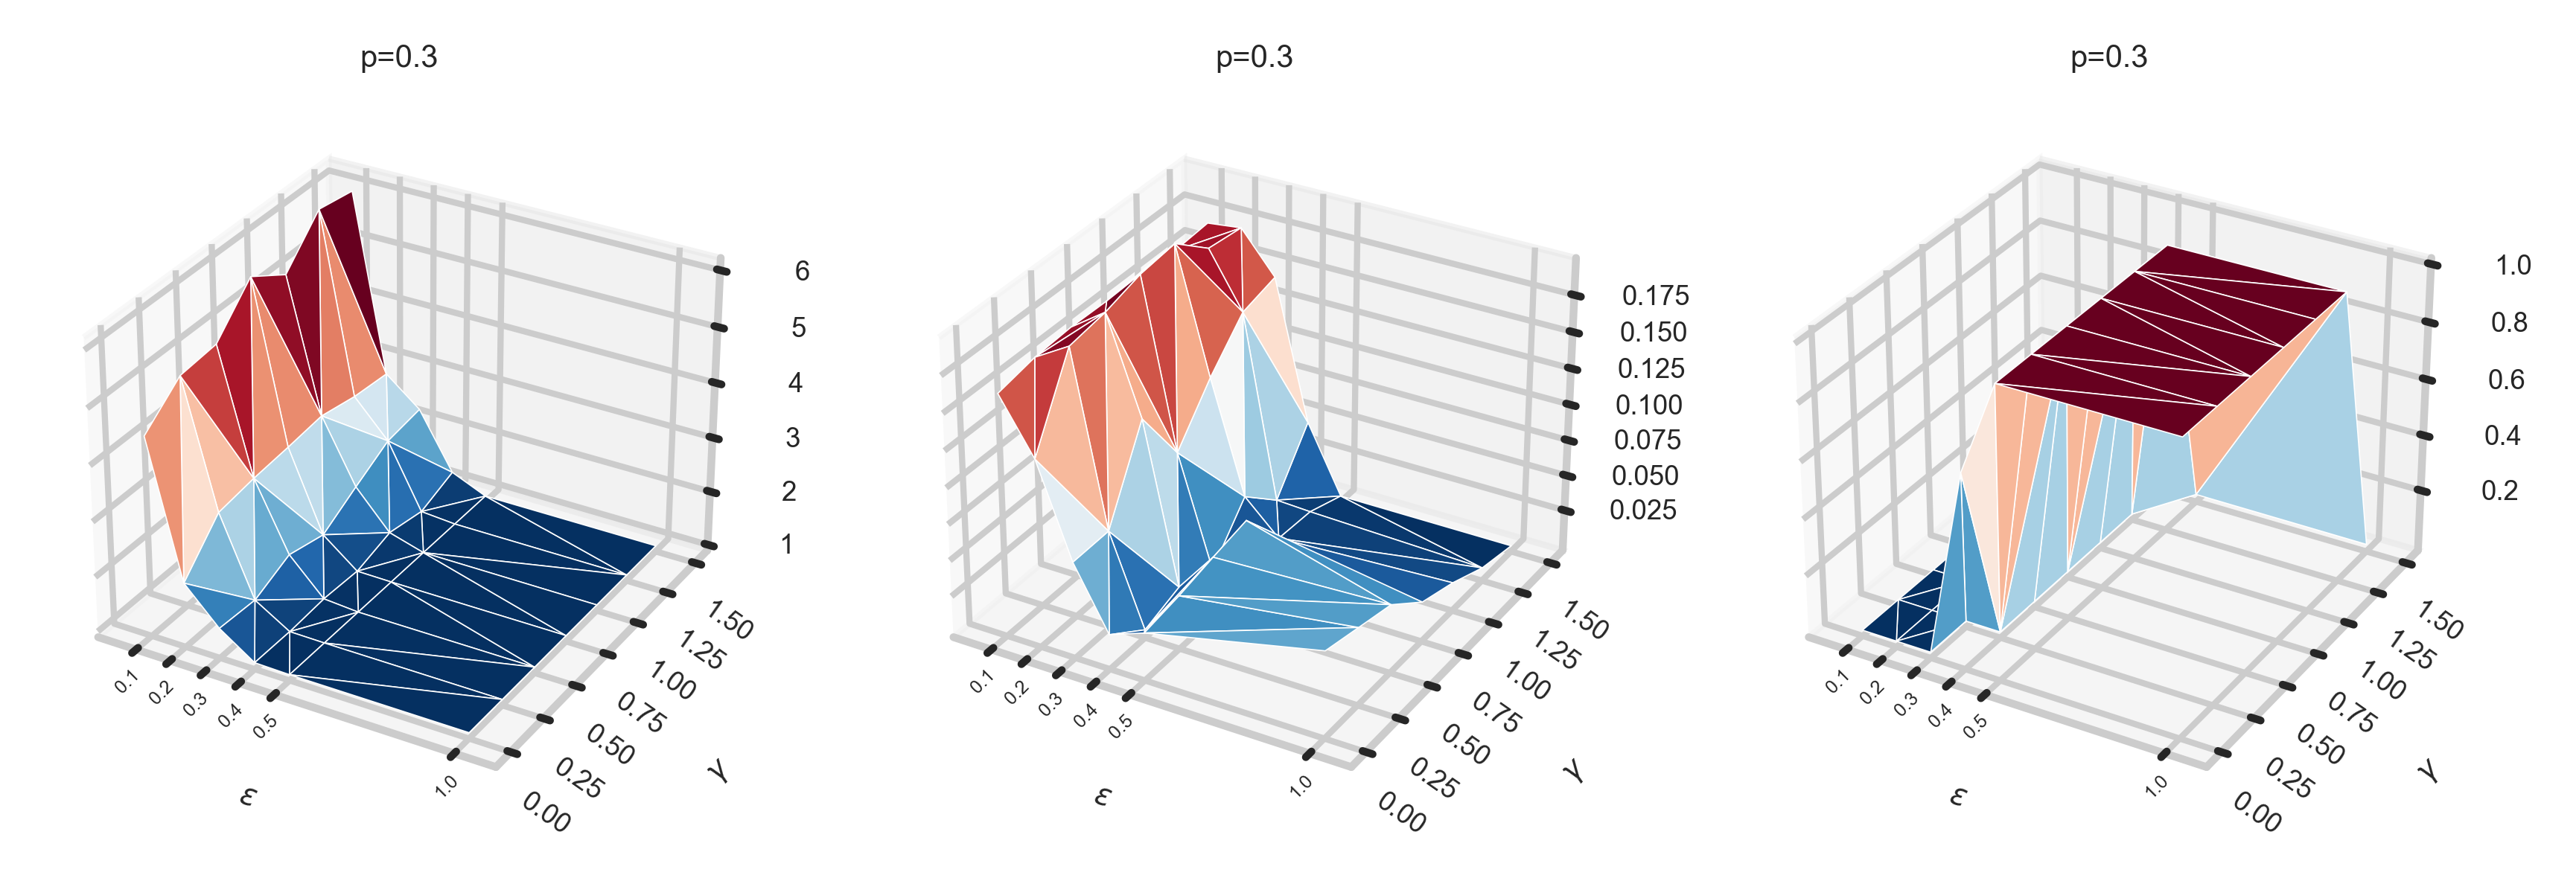

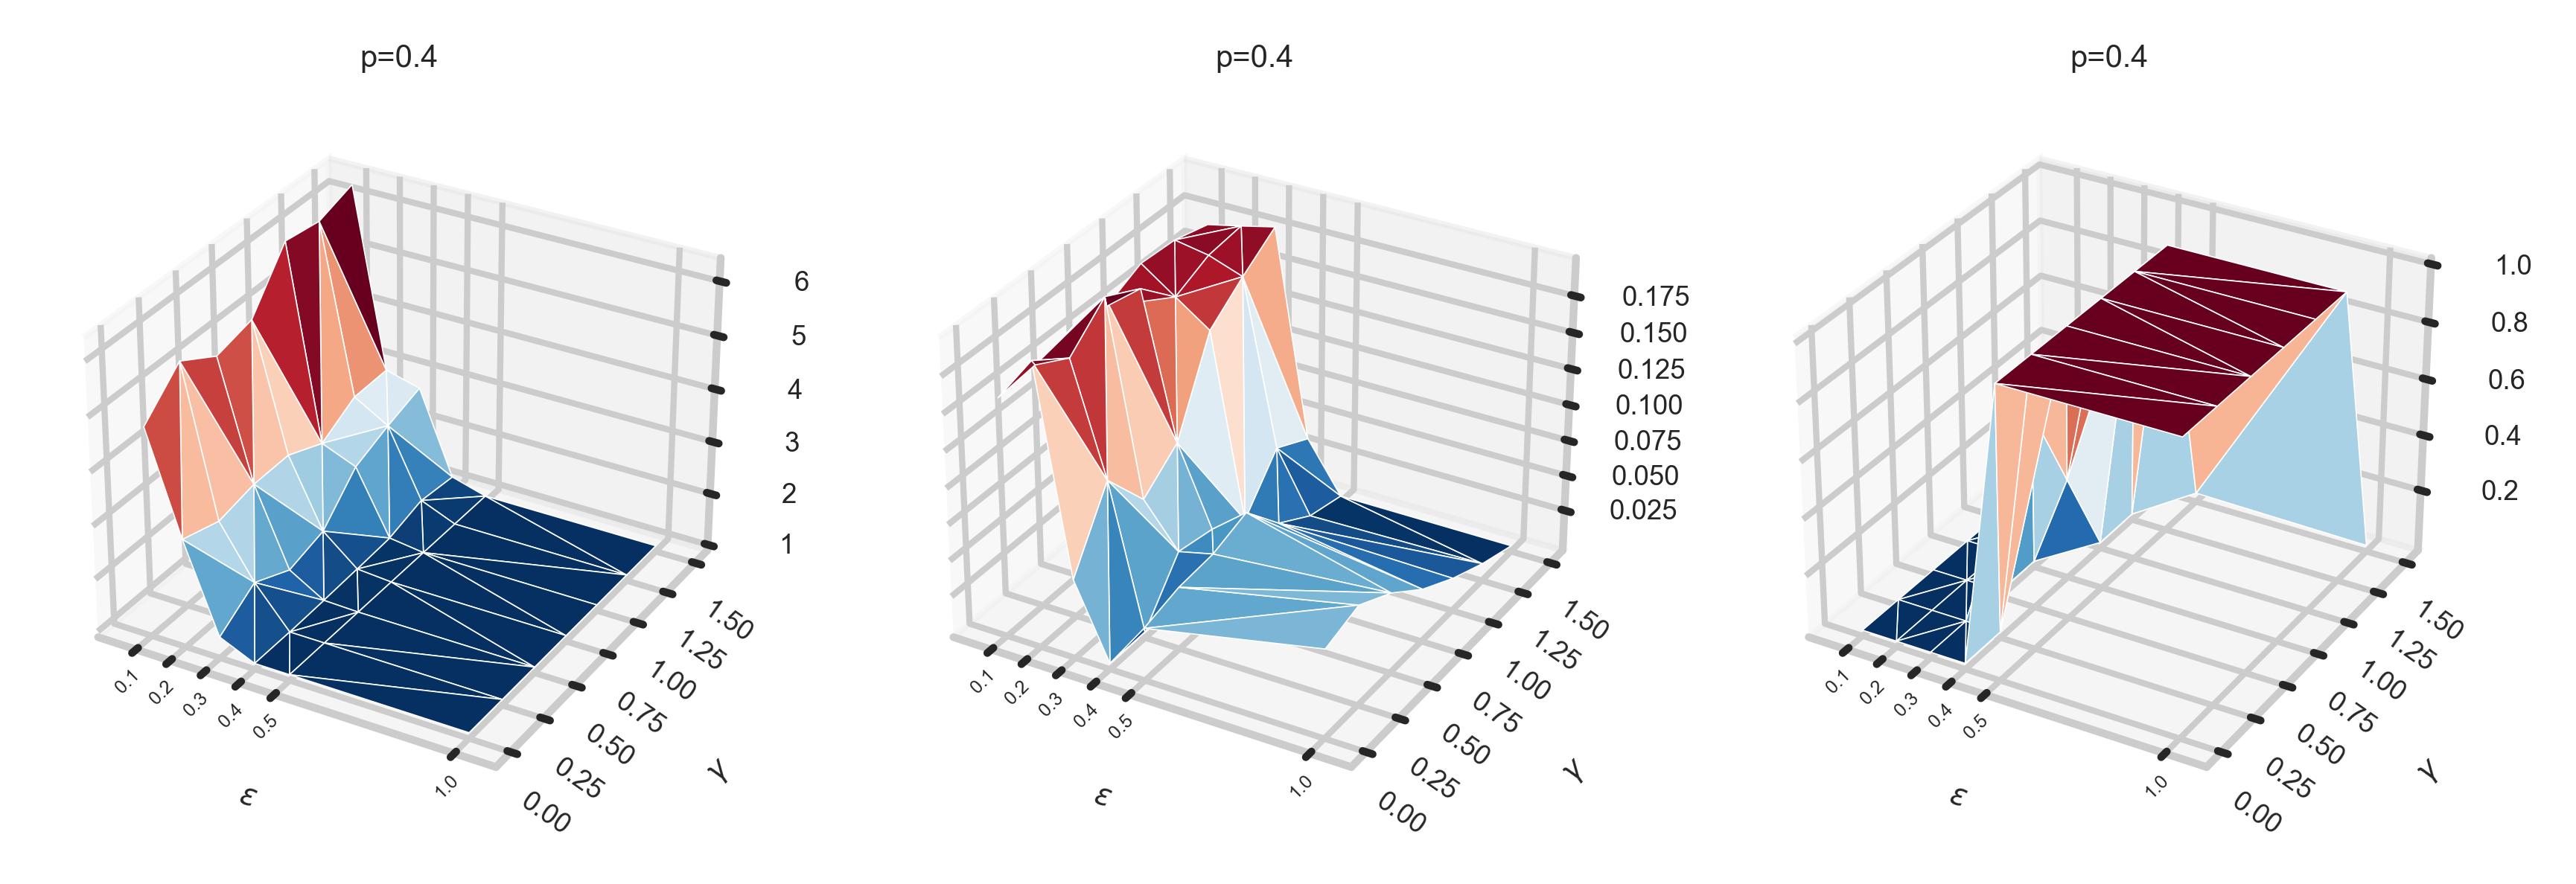

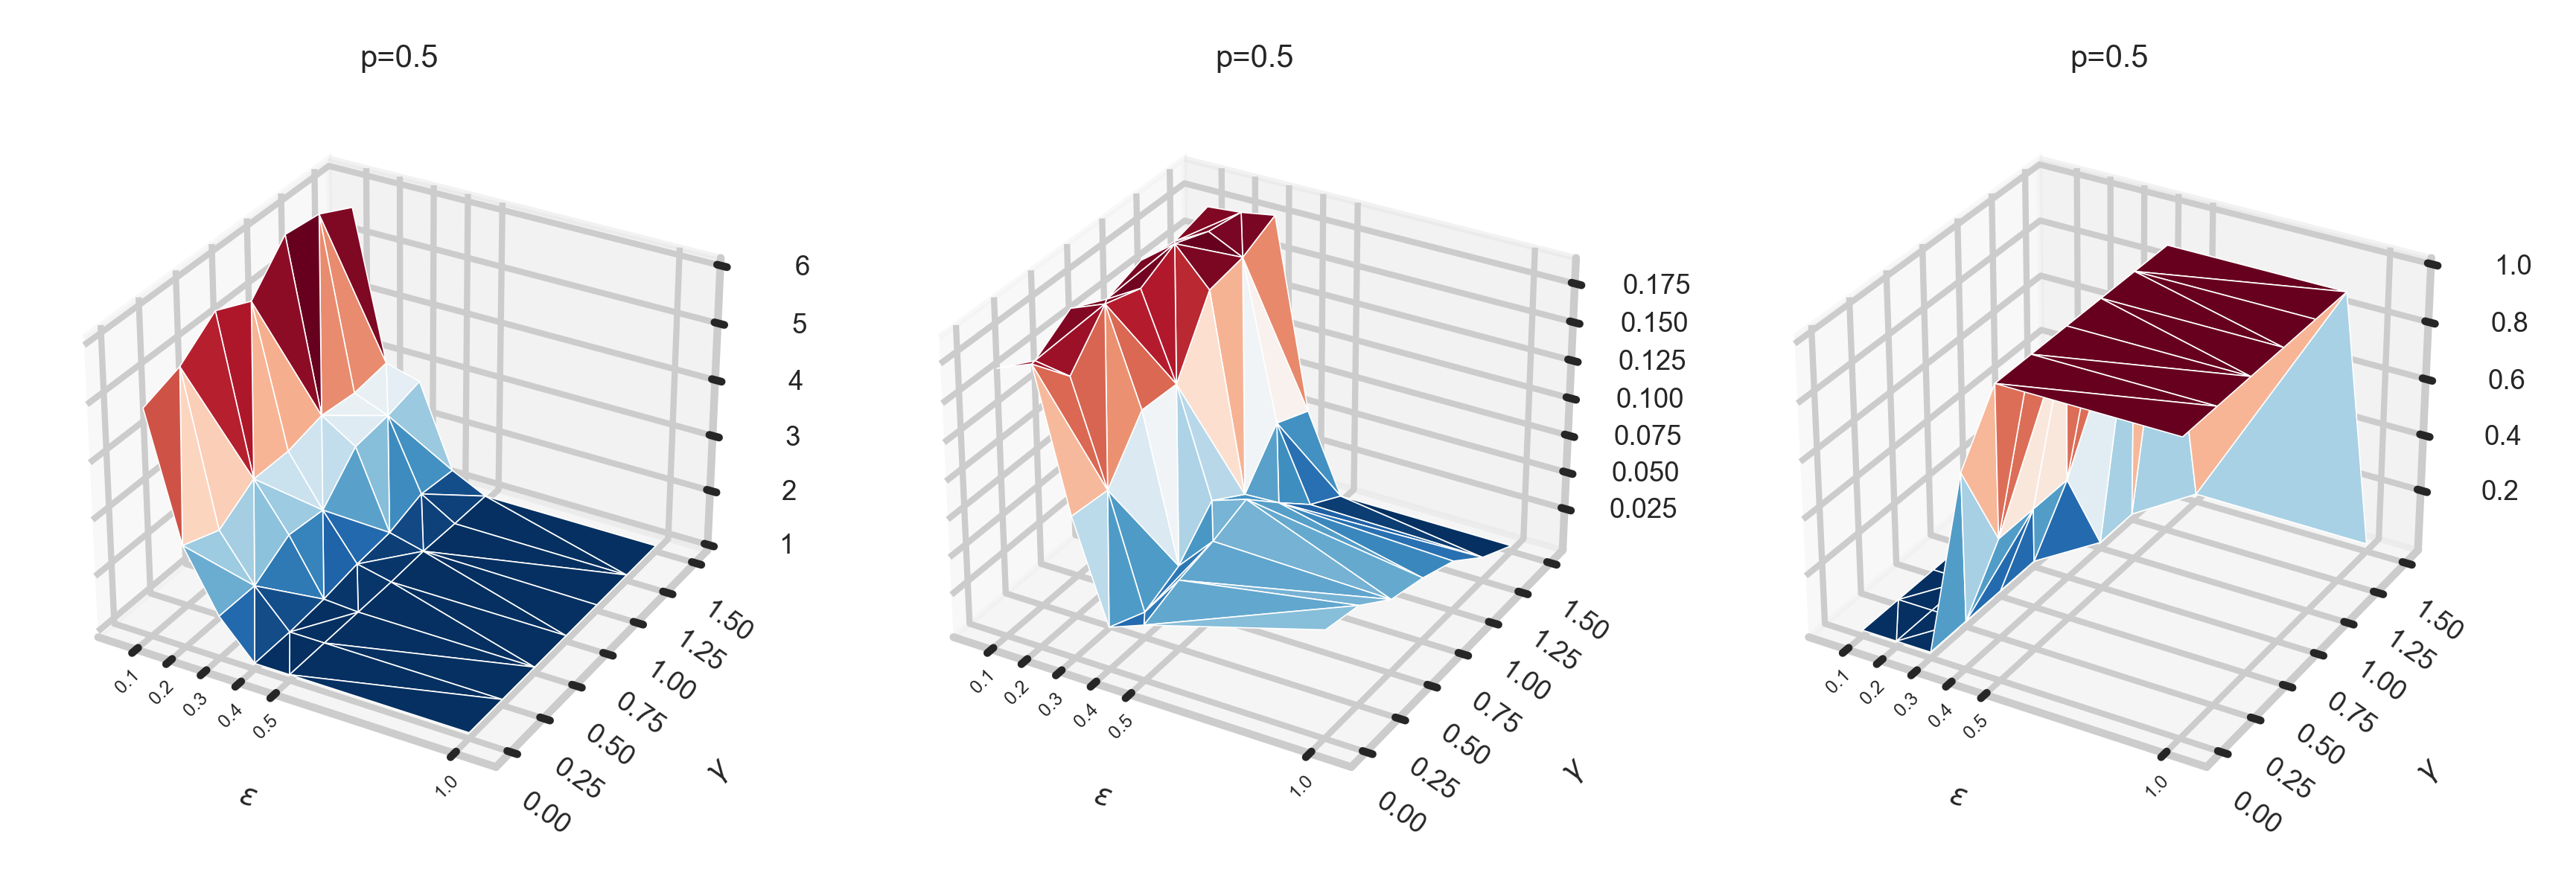

In [78]:
for measure in measures:
    heatmapsplot(threemedia, measure, "eps", "gam", "p_media")
    heatmapsplot(threemedia, measure, "p_media", "gam", "eps")
for p in threemedia.p_media.unique():
    trisurfplot(threemedia, p)

FileNotFoundError: [Errno 2] No such file or directory: 'plots/evolution/evolution_plot media mo[0.05,0.5,0.95] p0.0 e0.1 g0.0 gm0.0 mi1000000 nr1.png'

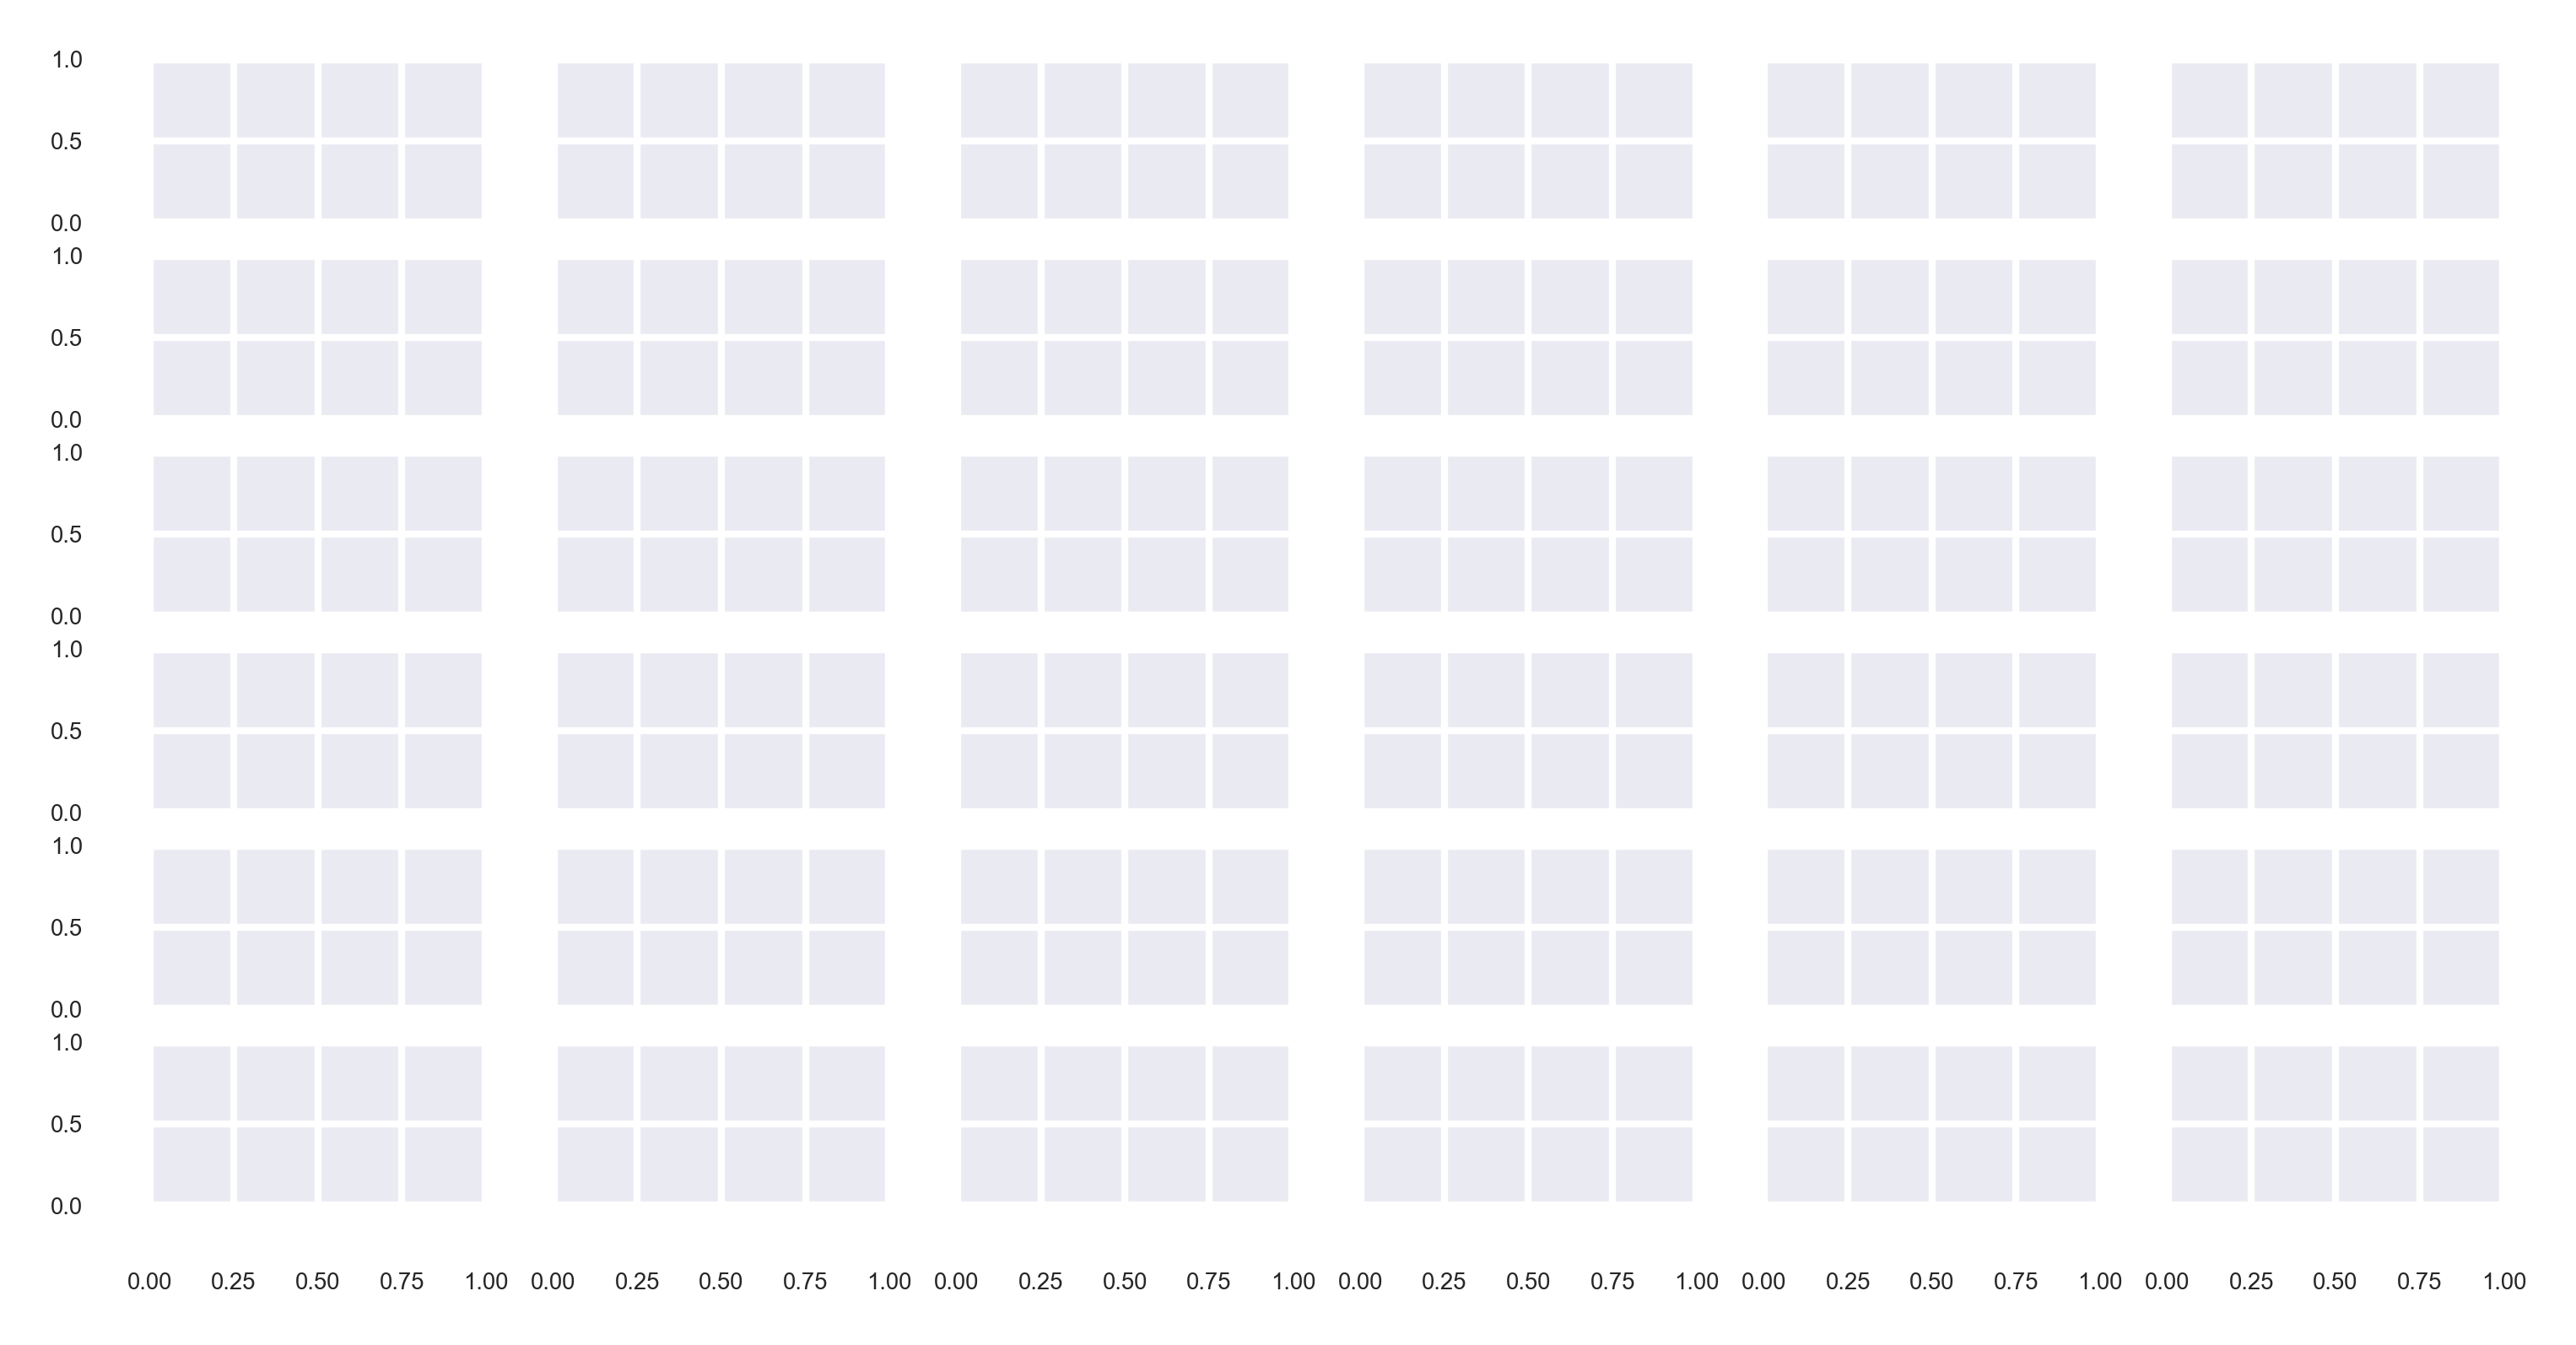

In [87]:
df = threemedia
sns.set_theme(style="white")
sns.set_context("paper")
sns.set(font_scale=0.3)   
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(6, 3), dpi=600, sharey=True, sharex=True)
path = "plots/evolution/"
for p in [0.0, 0.3, 0.5]:
    row = 0
    for e in [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]:
        col=0
        for g in [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]: 
            filename = "evolution_plot media mo{} p{} e{} g{} gm{} mi1000000 nr1.png".format('['+",".join(list(threemedia.media_op.unique())[0].split(';'))+']', p, e, g, g)
            image = plt.imread(path+filename)
            im = axes[row, col].imshow(image)
            ax = plt.gca()
            ax.set_xticks([])
            ax.set_yticks([])
            ax.grid(visible=None)
            col+=1
        row+=1
    print("saving spaghetti grid plot")
    fig.suptitle("p={}".format(p))
    plt.savefig("plots/evolution_grid media mo{} p{}.png".format(list(df.media_op.unique())[0], p))